In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df1= pd.read_csv("/content/Regional Sales Dataset(Sales Orders)-2.csv")
df2= pd.read_csv("/content/Regional Sales Dataset(Regions).csv")
df3= pd.read_csv("/content/Regional Sales Dataset(Products).csv")
df4= pd.read_csv("/content/Regional Sales Dataset(Customers).csv")
df6= pd.read_csv("/content/Regional Sales Dataset(2017 Budgets).csv")
df5= pd.read_csv("/content/Regional Sales Dataset(State Regions).csv")

df1.info()

#convert orderdate to date type
df1['OrderDate'] = pd.to_datetime(df1['OrderDate'])
df1.info()

# convert u.p, l.t, t.u.c to numeric data type
# Remove commas from 'Unit Price' before converting to numeric
df1['Unit Price'] = df1['Unit Price'].astype(str).str.replace(',', '', regex=False)
df1['Unit Price']= pd.to_numeric(df1['Unit Price'],errors= 'coerce')

# Remove commas from 'Line Total' before converting to numeric
df1['Line Total'] = df1['Line Total'].astype(str).str.replace(',', '', regex=False)
df1['Line Total']= pd.to_numeric(df1['Line Total'], errors= 'coerce')

# Remove commas from 'Total Unit Cost' before converting to numeric
df1['Total Unit Cost'] = df1['Total Unit Cost'].astype(str).str.replace(',', '', regex=False)
df1['Total Unit Cost']= pd.to_numeric(df1['Total Unit Cost'], errors= 'coerce')

df1.info()



#deleting empty columns

df1.drop('Unnamed: 12',axis= 1,inplace= True)
df1.drop('Unnamed: 13',axis= 1,inplace= True)
df1.info()

# Strip any leading/trailing spaces in Customer Names
df4['Customer Names'] = df4['Customer Names'].str.strip()
df4.head()


df5.info()
# Data Cleaning for State Regions
#Strip strings and ensure no duplicates
df5.columns = ['State Code', 'State', 'Region']  # Assuming from data
df5['State Code'] = df5['State Code'].str.strip()
df5['State'] = df5['State'].str.strip()
df5['Region'] = df5['Region'].str.strip()
df5.drop_duplicates(subset=['State Code'], inplace=True)
df5.head()

df3.info()

#Strip Product Name
df3['Product Name'] = df3['Product Name'].str.strip()
df3.head()

df6.info()

# Step 2: Remove commas and convert to float
df6['2017 Budgets'] = df6['2017 Budgets'].astype(str).str.replace(',', '', regex=False)
df6['2017 Budgets'] = pd.to_numeric(df6['2017 Budgets'], errors='coerce')
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OrderNumber                64104 non-null  object 
 1   OrderDate                  64104 non-null  object 
 2   Customer Name Index        64104 non-null  int64  
 3   Channel                    64104 non-null  object 
 4   Currency Code              64104 non-null  object 
 5   Warehouse Code             64104 non-null  object 
 6   Delivery Region Index      64104 non-null  int64  
 7   Product Description Index  64104 non-null  int64  
 8   Order Quantity             64104 non-null  int64  
 9   Unit Price                 64104 non-null  object 
 10  Line Total                 64104 non-null  object 
 11  Total Unit Cost            64104 non-null  object 
 12  Unnamed: 12                0 non-null      float64
 13  Unnamed: 13                0 non-null      flo

In [2]:

df2.to_csv('cleaned_regions.csv', index=False)
print("Cleaned df2 saved to 'cleaned_regions.csv'")

df3.to_csv('cleaned_products.csv', index=False)
print("Cleaned df3 saved to 'cleaned_products.csv'")

df4.to_csv('cleaned_customers.csv', index=False)
print("Cleaned df4 saved to 'cleaned_customers.csv'")

df5.to_csv('cleaned_state_regions.csv', index=False)
print("Cleaned df5 saved to 'cleaned_state_regions.csv'")

df6.to_csv('cleaned_2017_budgets.csv', index=False)
print("Cleaned df6 saved to 'cleaned_2017_budgets.csv'")
df1.to_csv('cleaned_sales_orders.csv', index=False)
print("cleaned df1 saved to 'cleaned_sales_orders.csv'")



Cleaned df2 saved to 'cleaned_regions.csv'
Cleaned df3 saved to 'cleaned_products.csv'
Cleaned df4 saved to 'cleaned_customers.csv'
Cleaned df5 saved to 'cleaned_state_regions.csv'
Cleaned df6 saved to 'cleaned_2017_budgets.csv'
cleaned df1 saved to 'cleaned_sales_orders.csv'



#Loading the cleaned CSV files back into pandas DataFrames.


In [3]:
df_sales_orders = pd.read_csv('cleaned_sales_orders.csv')
df_regions = pd.read_csv('cleaned_regions.csv')
df_products = pd.read_csv('cleaned_products.csv')
df_customers = pd.read_csv('cleaned_customers.csv')
df_state_regions = pd.read_csv('cleaned_state_regions.csv')
df_budgets = pd.read_csv('cleaned_2017_budgets.csv')

# Convert 'OrderDate' back to datetime after reading from CSV
df_sales_orders['OrderDate'] = pd.to_datetime(df_sales_orders['OrderDate'])

display(df_sales_orders.head())
display(df_regions.head())
display(df_products.head())
display(df_customers.head())
display(df_state_regions.head())
display(df_budgets.head())

OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2014-01-01                  126    Wholesale           USD   
1  SO - 0003378 2014-01-01                   96  Distributor           USD   
2  SO - 0005126 2014-01-01                    8    Wholesale           USD   
3  SO - 0005614 2014-01-01                   42       Export           USD   
4  SO - 0005781 2014-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  Line Total  Total Unit Cost  
0               6      2499.1     14994.6          1824.34  
1              11      2351.7     25868.7          1269.92  
2               6       978.2      5869.2           684.74  
3               7      2338.3     16368.1          1028.85  
4               8      2291.4     18331.2          1260.27

id        name                                   county state_code  \
0   1      Auburn                               Lee County         AL   
1   2  Birmingham           Shelby County/Jefferson County         AL   
2   3     Decatur           Limestone County/Morgan County         AL   
3   4      Dothan  Dale County/Houston County/Henry County         AL   
4   5      Hoover           Shelby County/Jefferson County         AL   

     state  type  latitude  longitude  area_code  population  households  \
0  Alabama  City  32.60986  -85.48078        334       62059       21767   
1  Alabama  City  33.52744  -86.79905        205      212461       89972   
2  Alabama  City  34.57332  -86.99214        256       55437       22294   
3  Alabama  City  31.23370  -85.40682        334       68567       25913   
4  Alabama  City  33.37695  -86.80558        205       84848       32789   

   median_income  land_area  water_area        time_zone  
0          38342  152375113     2646161  America/Chicago  
1          31061  378353942     6591013  America/Chicago  
2          41496  141006257    17594716  America/Chicago  
3          42426  232166237      835468  America/Chicago  
4          77146  122016784     2553332  America/Chicago

Index Product Name
0      1    Product 1
1      2    Product 2
2      3    Product 3
3      4    Product 4
4      5    Product 5

Customer Index Customer Names
0               1  Geiss Company
1               2  Jaxbean Group
2               3     Ascend Ltd
3               4      Eire Corp
4               5   Blogtags Ltd

State Code       State  Region
0  State Code       State  Region
1          AL     Alabama   South
2          AR    Arkansas   South
3          AZ     Arizona    West
4          CA  California    West

Product Name  2017 Budgets
0    Product 1    3016489.21
1    Product 2    3050087.57
2    Product 3    2642352.43
3    Product 4    2885560.82
4    Product 5    3925424.54


#Determining the common columns needed to merge the different dataframes.


In [4]:
print("Columns in df_sales_orders:", df_sales_orders.columns)
print("Columns in df_regions:", df_regions.columns)
print("Columns in df_products:", df_products.columns)
print("Columns in df_customers:", df_customers.columns)
print("Columns in df_state_regions:", df_state_regions.columns)
print("Columns in df_budgets:", df_budgets.columns)

Columns in df_sales_orders: Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost'],
      dtype='object')
Columns in df_regions: Index(['id', 'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone'],
      dtype='object')
Columns in df_products: Index(['Index', 'Product Name'], dtype='object')
Columns in df_customers: Index(['Customer Index', 'Customer Names'], dtype='object')
Columns in df_state_regions: Index(['State Code', 'State', 'Region'], dtype='object')
Columns in df_budgets: Index(['Product Name', '2017 Budgets'], dtype='object')



#Identify the common columns



In [5]:
# df_sales_orders and df_customers
# Common column: 'Customer Name Index' in df_sales_orders and 'Customer Index' in df_customers

#  df_sales_orders and df_products
# Common column: 'Product Description Index' in df_sales_orders and 'Index' in df_products

#  df_regions and df_state_regions
# Common column: 'state_code' in df_regions and 'State Code' in df_state_regions

#  df_budgets and df_products
# common column: 'product name' in df_budgets and 'product name' in df_products

print("Identified merge columns:")
print("df_sales_orders and df_customers: 'Customer Name Index' and 'Customer Index'")
print("df_sales_orders and df_products: 'Product Description Index' and 'Index'")
print("df_regions and df_state_regions: 'state_code' and 'State Code'")
print("df_budgets and df_products : 'Product Name' and Product Name'")

Identified merge columns:
df_sales_orders and df_customers: 'Customer Name Index' and 'Customer Index'
df_sales_orders and df_products: 'Product Description Index' and 'Index'
df_regions and df_state_regions: 'state_code' and 'State Code'
df_budgets and df_products : 'Product Name' and Product Name'


## Merge dataframes



In [6]:
# Merge df_sales_orders and df_customers
df_merged = pd.merge(df_sales_orders, df_customers, left_on='Customer Name Index', right_on='Customer Index', how='left')

# Merge the resulting DataFrame (df_merged) with df_products
df_merged = pd.merge(df_merged, df_products, left_on='Product Description Index', right_on='Index', how='left')

# Merge df_regions and df_state_regions into a temporary DataFrame
df_regions_states = pd.merge(df_regions, df_state_regions, left_on='state_code', right_on='State Code', how='left')

# Merge df_merged with the temporary DataFrame
df_merged = pd.merge(df_merged, df_regions_states, left_on='Delivery Region Index', right_on='id', how='left')

# Merge df_merged and df_budgets
df_merged= pd.merge(df_merged, df_budgets ,left_on='Product Name', right_on='Product Name', how='left')

# Display the first few rows of the final merged DataFrame
display(df_merged.head())

OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2014-01-01                  126    Wholesale           USD   
1  SO - 0003378 2014-01-01                   96  Distributor           USD   
2  SO - 0005126 2014-01-01                    8    Wholesale           USD   
3  SO - 0005614 2014-01-01                   42       Export           USD   
4  SO - 0005781 2014-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  ...  population  households  median_income  \
0               6      2499.1  ...      145674       52798          36466   
1              11      2351.7  ...       55586       20975          54176   
2               6       978.2  ...       79510       26020         124759   
3               7      2338.3  ...       84067       30232          30019   
4               8      2291.4  ...       58007       24141          63158   

   land_area  water_area                     time_zone  State Code  \
0  268318796    13908113              America/New York          GA   
1   72276415        1883  America/Indiana/Indianapolis          IN   
2   62489257      386195           America/Los Angeles          CA   
3   60221613      475857  America/Indiana/Indianapolis          IN   
4   70972793      720300              America/New York          CT   

         State     Region 2017 Budgets  
0      Georgia      South    964940.23  
1      Indiana    Midwest   2067108.12  
2   California       West   5685138.27  
3      Indiana    Midwest    889737.56  
4  Connecticut  Northeast   1085037.33  

[5 rows x 35 columns]

In [7]:
df_merged['Total Cost']=(df_merged['Order Quantity'] * df_merged['Total Unit Cost'])
df_merged['Profit']= (df_merged['Line Total'] - df_merged['Total Cost'])
df_merged['Profit Margin']= (df_merged['Profit'] / df_merged['Line Total']) * 100


display(df_merged.head())
print("Shape of the merged dataframe:", df_merged.shape)
print("\nMissing values in the merged dataframe:")
print(df_merged.isnull().sum())

OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2014-01-01                  126    Wholesale           USD   
1  SO - 0003378 2014-01-01                   96  Distributor           USD   
2  SO - 0005126 2014-01-01                    8    Wholesale           USD   
3  SO - 0005614 2014-01-01                   42       Export           USD   
4  SO - 0005781 2014-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  ...  land_area  water_area  \
0               6      2499.1  ...  268318796    13908113   
1              11      2351.7  ...   72276415        1883   
2               6       978.2  ...   62489257      386195   
3               7      2338.3  ...   60221613      475857   
4               8      2291.4  ...   70972793      720300   

                      time_zone State Code        State     Region  \
0              America/New York         GA      Georgia      South   
1  America/Indiana/Indianapolis         IN      Indiana    Midwest   
2           America/Los Angeles         CA   California       West   
3  America/Indiana/Indianapolis         IN      Indiana    Midwest   
4              America/New York         CT  Connecticut  Northeast   

   2017 Budgets Total Cost    Profit Profit Margin  
0     964940.23   10946.04   4048.56     27.000120  
1    2067108.12   13969.12  11899.58     45.999915  
2    5685138.27    4108.44   1760.76     30.000000  
3     889737.56    7201.95   9166.15     56.000086  
4    1085037.33   10082.16   8249.04     45.000000  

[5 rows x 38 columns]

Shape of the merged dataframe: (64104, 38)

Missing values in the merged dataframe:
OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
Customer Index               0
Customer Names               0
Index                        0
Product Name                 0
id                           0
name                         0
county                       0
state_code                   0
state                        0
type                         0
latitude                     0
longitude                    0
area_code                    0
population                   0
households                   0
median_income                0
land_area                    0
water_area       

In [8]:
# Convert 'OrderDate' to datetime  again
df_merged['OrderDate'] = pd.to_datetime(df_merged['OrderDate'])

# Identify rows where the year of OrderDate is not 2017
non_2017_orders = df_merged[df_merged['OrderDate'].dt.year != 2017].index

# Set '2017 Budgets' to NaN for non-2017 orders
df_merged.loc[non_2017_orders, '2017 Budgets'] = np.nan

# Display the first few rows to show the change (if any of the first rows are non-2017)
display(df_merged.head())

# Display info to see the non-null count for '2017 Budgets'
df_merged.info()

OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2014-01-01                  126    Wholesale           USD   
1  SO - 0003378 2014-01-01                   96  Distributor           USD   
2  SO - 0005126 2014-01-01                    8    Wholesale           USD   
3  SO - 0005614 2014-01-01                   42       Export           USD   
4  SO - 0005781 2014-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  ...  land_area  water_area  \
0               6      2499.1  ...  268318796    13908113   
1              11      2351.7  ...   72276415        1883   
2               6       978.2  ...   62489257      386195   
3               7      2338.3  ...   60221613      475857   
4               8      2291.4  ...   70972793      720300   

                      time_zone State Code        State     Region  \
0              America/New York         GA      Georgia      South   
1  America/Indiana/Indianapolis         IN      Indiana    Midwest   
2           America/Los Angeles         CA   California       West   
3  America/Indiana/Indianapolis         IN      Indiana    Midwest   
4              America/New York         CT  Connecticut  Northeast   

   2017 Budgets Total Cost    Profit Profit Margin  
0           NaN   10946.04   4048.56     27.000120  
1           NaN   13969.12  11899.58     45.999915  
2           NaN    4108.44   1760.76     30.000000  
3           NaN    7201.95   9166.15     56.000086  
4           NaN   10082.16   8249.04     45.000000  

[5 rows x 38 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
 12  Cust


#Checking the merged dataframe for correctness and completeness.


#EDA analysis


#Checking the data types of all columns in the merged dataframe to identify numerical, categorical



#Displaying the data types of all columns in the merged dataframe to identify numerical, categorical columns as per the instructions.



In [9]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
 12  Cust


#Based on the output of `df_merged.info()`, manually identify and list the columns that are numerical, categorical types as requested by the instructions.



In [10]:
# Numerical columns (int64 and float64)
numerical_cols = [
    'Customer Name Index', 'Delivery Region Index', 'Product Description Index',
    'Order Quantity', 'Unit Price', 'Line Total', 'Total Unit Cost',
    'Customer Index', 'Index', 'id', 'latitude', 'longitude', 'area_code',
    'population', 'households', 'median_income', 'land_area', 'water_area'
]

# Categorical columns (object)
categorical_cols = [
    'OrderNumber', 'Channel', 'Currency Code', 'Warehouse Code',
    'Customer Names', 'Product Name', 'name', 'county', 'state_code',
    'state', 'type', 'time_zone', 'State Code', 'State', 'Region'
]



print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['Customer Name Index', 'Delivery Region Index', 'Product Description Index', 'Order Quantity', 'Unit Price', 'Line Total', 'Total Unit Cost', 'Customer Index', 'Index', 'id', 'latitude', 'longitude', 'area_code', 'population', 'households', 'median_income', 'land_area', 'water_area']
Categorical Columns: ['OrderNumber', 'Channel', 'Currency Code', 'Warehouse Code', 'Customer Names', 'Product Name', 'name', 'county', 'state_code', 'state', 'type', 'time_zone', 'State Code', 'State', 'Region']


## Analyzing numerical variables






#descriptive statistics for all numerical columns.



In [11]:
# Calculate descriptive statistics for numerical columns
display(df_merged[numerical_cols].describe())

Customer Name Index  Delivery Region Index  Product Description Index  \
count         64104.000000           64104.000000               64104.000000   
mean             87.480064             495.086609                  14.913141   
std              49.884946             285.645893                   8.787032   
min               1.000000               1.000000                   1.000000   
25%              45.000000             247.000000                   6.000000   
50%              87.000000             493.000000                  15.000000   
75%             130.000000             742.000000                  24.000000   
max             175.000000             994.000000                  30.000000   

       Order Quantity    Unit Price    Line Total  Total Unit Cost  \
count    64104.000000  64104.000000  64104.000000     64104.000000   
mean         8.441689   2284.380803  19280.682937      1432.084340   
std          2.276217   1663.598141  15429.602766      1107.705766   
min          5.000000    167.500000    837.500000        68.680000   
25%          6.000000   1031.800000   8019.900000       606.220000   
50%          8.000000   1855.900000  14023.100000      1084.500000   
75%         10.000000   3606.275000  27416.400000      2046.932500   
max         12.000000   6566.000000  78711.600000      5498.560000   

       Customer Index         Index            id      latitude     longitude  \
count    64104.000000  64104.000000  64104.000000  64104.000000  64104.000000   
mean        87.480064     14.913141    495.086609     37.769427    -94.247116   
std         49.884946      8.787032    285.645893      5.068599     16.884334   
min          1.000000      1.000000      1.000000     25.468720   -123.262040   
25%         45.000000      6.000000    247.000000     33.953330   -112.034140   
50%         87.000000     15.000000    493.000000     39.114170    -88.200900   
75%        130.000000     24.000000    742.000000     41.676550    -80.407000   
max        175.000000     30.000000    994.000000     48.759550    -70.255330   

          area_code    population    households  median_income     land_area  \
count  64104.000000  6.410400e+04  6.410400e+04   64104.000000  6.410400e+04   
mean     610.927945  1.590968e+05  5.702520e+04   59396.944325  1.278377e+08   
std      240.981103  3.997688e+05  1.437733e+05   21556.192739  1.783448e+08   
min      202.000000  5.013800e+04  0.000000e+00       0.000000  2.575149e+06   
25%      405.000000  6.106800e+04  2.263900e+04   43163.000000  4.865395e+07   
50%      626.000000  8.329800e+04  2.951800e+04   53587.500000  8.434784e+07   
75%      832.000000  1.286670e+05  4.540900e+04   71897.000000  1.283868e+08   
max      979.000000  8.550405e+06  3.113535e+06  149837.000000  1.935873e+09   

         water_area  
count  6.410400e+04  
mean   1.287047e+07  
std    5.804327e+07  
min    0.000000e+00  
25%    2.807360e+05  
50%    1.264402e+06  
75%    4.850146e+06  
max    8.521186e+08


#Generating histograms, box plots, and density plots for a selection of key numerical columns to visualize their distributions and identify potential outliers.



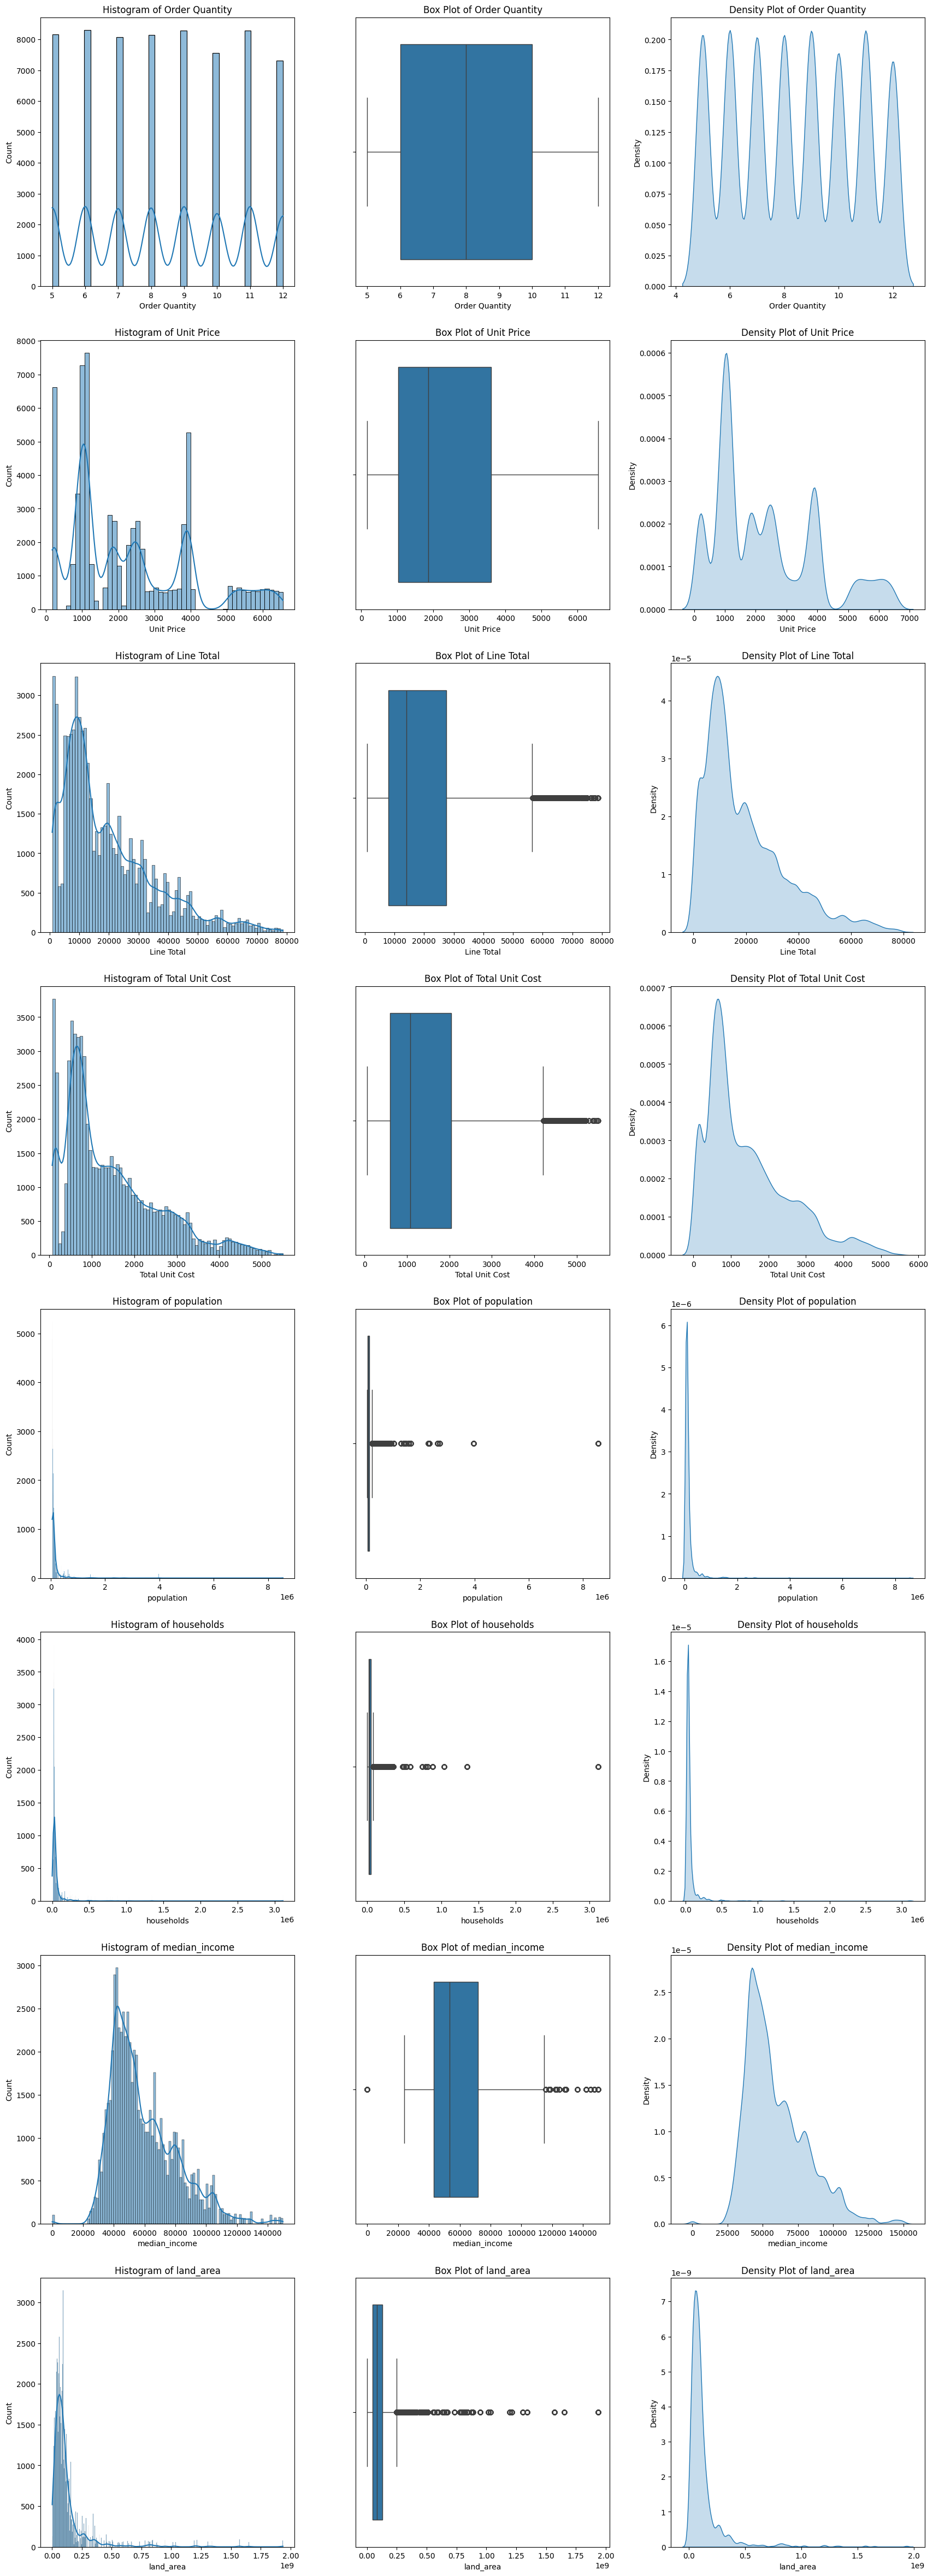

In [12]:
# Select a subset of numerical columns for visualization that are most relevant to sales analysis
numerical_cols_viz = [
    'Order Quantity',
    'Unit Price',
    'Line Total',
    'Total Unit Cost',
    'population',
    'households',
    'median_income',
    'land_area'
]

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=len(numerical_cols_viz), ncols=3, figsize=(18, 6 * len(numerical_cols_viz)))
fig.tight_layout(pad=5.0)

for i, col in enumerate(numerical_cols_viz):
    # Histogram
    sns.histplot(data=df_merged, x=col, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {col}')

    # Box Plot
    sns.boxplot(data=df_merged, x=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {col}')

    # Density Plot
    sns.kdeplot(data=df_merged, x=col, ax=axes[i, 2], fill=True)
    axes[i, 2].set_title(f'Density Plot of {col}')

plt.show()


Perform bivariate and multivariate analysis on the provided dataset to identify relationships and dependencies between numerical and categorical columns.

## Identifying relevant columns




In [13]:
# Select relevant numerical columns for bivariate and multivariate analysis
selected_numerical_cols = [
    'Order Quantity',
    'Unit Price',
    'Line Total',
    'Total Unit Cost',
    'population',
    'median_income'
]

# Select relevant categorical columns for bivariate and multivariate analysis
selected_categorical_cols = [
    'Channel',
    'Region',
    'Product Name',
    'Customer Names'
]

print("Selected Numerical Columns for Bivariate/Multivariate Analysis:", selected_numerical_cols)
print("Selected Categorical Columns for Bivariate/Multivariate Analysis:", selected_categorical_cols)

Selected Numerical Columns for Bivariate/Multivariate Analysis: ['Order Quantity', 'Unit Price', 'Line Total', 'Total Unit Cost', 'population', 'median_income']
Selected Categorical Columns for Bivariate/Multivariate Analysis: ['Channel', 'Region', 'Product Name', 'Customer Names']


## relationships between numerical columns



#correlation matrix for the selected numerical columns and visualize it using a heatmap to understand linear relationships.



Order Quantity  Unit Price  Line Total  Total Unit Cost  \
Order Quantity         1.000000   -0.000884    0.335208        -0.004765   
Unit Price            -0.000884    1.000000    0.909274         0.941904   
Line Total             0.335208    0.909274    1.000000         0.854934   
Total Unit Cost       -0.004765    0.941904    0.854934         1.000000   
population             0.003216   -0.000066    0.001395         0.000572   
median_income          0.001424    0.005837    0.006058         0.006067   

                 population  median_income  
Order Quantity     0.003216       0.001424  
Unit Price        -0.000066       0.005837  
Line Total         0.001395       0.006058  
Total Unit Cost    0.000572       0.006067  
population         1.000000      -0.087303  
median_income     -0.087303       1.000000

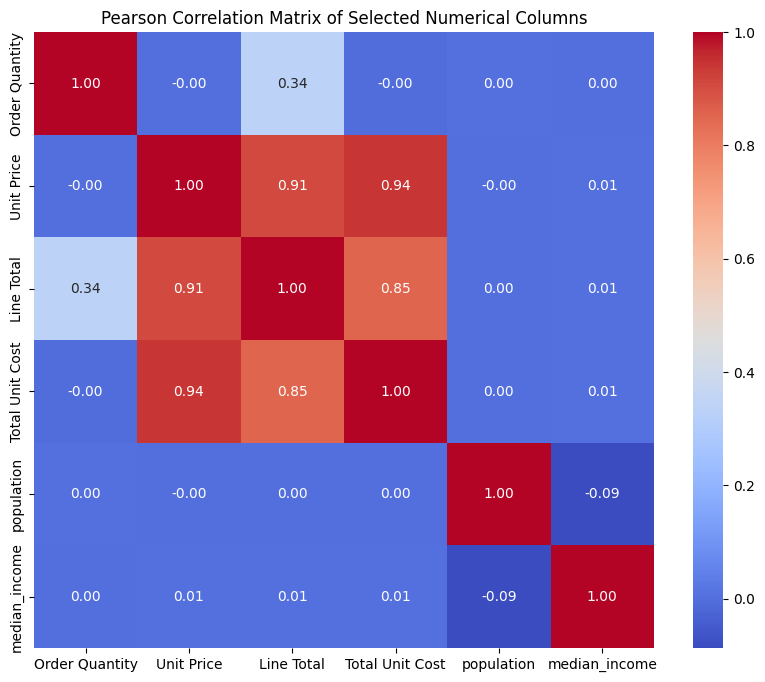

In [14]:
# Calculate the correlation matrix
correlation_matrix = df_merged[selected_numerical_cols].corr(method='pearson')

# Display the correlation matrix
display(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix of Selected Numerical Columns')
plt.show()

## Relationships between categorical and numerical columns




#Descriptive statistics for numerical columns grouped by each categorical column.



In [15]:
for cat_col in selected_categorical_cols:
    print(f"\nDescriptive statistics of numerical columns grouped by '{cat_col}':")
    display(df_merged.groupby(cat_col)[selected_numerical_cols].describe())


Descriptive statistics of numerical columns grouped by 'Channel':


Order Quantity                                                 \
                     count      mean       std  min  25%  50%   75%   max   
Channel                                                                     
Distributor        19968.0  8.392127  2.265447  5.0  6.0  8.0  10.0  12.0   
Export              9540.0  8.463522  2.294135  5.0  6.0  8.0  11.0  12.0   
Wholesale          34596.0  8.464273  2.277071  5.0  6.0  8.0  10.0  12.0   

            Unit Price               ... population            median_income  \
                 count         mean  ...        75%        max         count   
Channel                              ...                                       
Distributor    19968.0  2316.820944  ...   127657.0  8550405.0       19968.0   
Export          9540.0  2244.183962  ...   128874.0  8550405.0        9540.0   
Wholesale      34596.0  2276.741571  ...   128874.0  8550405.0       34596.0   

                                                                         \
                     mean           std  min      25%      50%      75%   
Channel                                                                   
Distributor  59323.617538  21488.976517  0.0  43109.0  53587.0  71609.0   
Export       59495.429979  21609.452208  0.0  43189.0  53617.0  71963.0   
Wholesale    59412.108972  21580.693316  0.0  43163.0  53587.0  71897.0   

                       
                  max  
Channel                
Distributor  149837.0  
Export       149837.0  
Wholesale    149837.0  

[3 rows x 48 columns]


Descriptive statistics of numerical columns grouped by 'Region':


Order Quantity                                                 \
                   count      mean       std  min  25%  50%   75%   max   
Region                                                                    
Midwest          16588.0  8.443031  2.270053  5.0  6.0  8.0  10.0  12.0   
Northeast        10643.0  8.456638  2.278132  5.0  6.0  8.0  10.0  12.0   
South            17333.0  8.439278  2.267549  5.0  6.0  8.0  10.0  12.0   
West             19540.0  8.434545  2.288176  5.0  6.0  8.0  10.0  12.0   

          Unit Price               ... population            median_income  \
               count         mean  ...        75%        max         count   
Region                             ...                                       
Midwest      16588.0  2285.630197  ...   112225.0  2720546.0       16588.0   
Northeast    10643.0  2314.498412  ...   110699.0  8550405.0       10643.0   
South        17333.0  2290.882029  ...   153511.0  2296224.0       17333.0   
West         19540.0  2261.148849  ...   139820.0  3971883.0       19540.0   

                                                                           \
                   mean           std      min      25%      50%      75%   
Region                                                                      
Midwest    58724.663190  20976.891793  24133.0  43104.0  53281.0  74034.0   
Northeast  61134.236963  23203.274914      0.0  41801.0  55777.0  76445.0   
South      54447.588357  20955.950602      0.0  40312.0  46744.0  63766.0   
West       63411.733521  20694.494766  33934.0  48813.0  57196.0  74610.0   

                     
                max  
Region               
Midwest    149837.0  
Northeast  128153.0  
South      144772.0  
West       147349.0  

[4 rows x 48 columns]


Descriptive statistics of numerical columns grouped by 'Product Name':


Order Quantity                                                  \
                      count      mean       std  min  25%  50%    75%   max   
Product Name                                                                  
Product 1            2904.0  8.311983  2.242862  5.0  6.0  8.0  10.00  12.0   
Product 10            870.0  8.503448  2.285062  5.0  7.0  9.0  10.00  12.0   
Product 11           1026.0  8.608187  2.396032  5.0  6.0  9.0  11.00  12.0   
Product 12           1098.0  8.557377  2.220088  5.0  7.0  9.0  11.00  12.0   
Product 13           3948.0  8.615502  2.264627  5.0  7.0  9.0  11.00  12.0   
Product 14           3858.0  8.419907  2.306766  5.0  6.0  9.0  10.00  12.0   
Product 15           3696.0  8.452922  2.248187  5.0  6.0  9.0  10.00  12.0   
Product 16           1926.0  8.607477  2.265409  5.0  7.0  9.0  10.00  12.0   
Product 17           2070.0  8.542029  2.317254  5.0  6.0  9.0  11.00  12.0   
Product 18           2082.0  8.527378  2.212947  5.0  7.0  9.0  11.00  12.0   
Product 19           1806.0  8.421927  2.214594  5.0  7.0  8.0  10.00  12.0   
Product 2            3162.0  8.318786  2.293180  5.0  6.0  8.0  10.00  12.0   
Product 20           1980.0  8.103030  2.363503  5.0  6.0  8.0  10.00  12.0   
Product 21            996.0  8.650602  2.168391  5.0  7.0  9.0  11.00  12.0   
Product 22            942.0  8.363057  2.125158  5.0  7.0  8.0  10.00  12.0   
Product 23            996.0  8.102410  2.387479  5.0  6.0  8.0  10.00  12.0   
Product 24            822.0  8.270073  2.217757  5.0  6.0  8.0  10.00  12.0   
Product 25           5994.0  8.401401  2.246759  5.0  6.0  8.0  10.00  12.0   
Product 26           5928.0  8.495951  2.291478  5.0  7.0  9.0  11.00  12.0   
Product 27           1080.0  8.244444  2.162848  5.0  7.0  8.0  10.00  12.0   
Product 28            996.0  8.608434  2.407962  5.0  6.0  8.0  11.00  12.0   
Product 29            960.0  8.343750  2.380964  5.0  6.0  8.0  10.25  12.0   
Product 3            2802.0  8.475375  2.252437  5.0  7.0  8.0  10.00  12.0   
Product 30           1026.0  8.350877  2.205466  5.0  7.0  8.0  10.00  12.0   
Product 4            2886.0  8.340956  2.168987  5.0  7.0  8.0  10.00  12.0   
Product 5            3348.0  8.569892  2.292128  5.0  7.0  9.0  11.00  12.0   
Product 6            2118.0  8.447592  2.290611  5.0  6.0  9.0  10.00  12.0   
Product 7             972.0  8.524691  2.262488  5.0  7.0  9.0  10.00  12.0   
Product 8            1002.0  8.377246  2.387823  5.0  6.0  9.0  11.00  12.0   
Product 9             810.0  8.451852  2.524692  5.0  6.0  9.0  11.00  12.0   

             Unit Price               ... population            median_income  \
                  count         mean  ...        75%        max         count   
Product Name                          ...                                       
Product 1        2904.0  2297.297107  ...  128874.00  8550405.0        2904.0   
Product 10        870.0  2371.938621  ...  121604.00  2720546.0         870.0   
Product 11       1026.0  2584.828655  ...  130308.75  8550405.0        1026.0   
Product 12       1098.0  2596.012022  ...  128132.75  8550405.0        1098.0   
Product 13       3948.0  2300.686322  ...  129339.00  8550405.0        3948.0   
Product 14       3858.0  2310.447589  ...  128874.00  8550405.0        3858.0   
Product 15       3696.0  2136.179708  ...  126118.00  8550405.0        3696.0   
Product 16       1926.0  2299.686293  ...  128874.00  8550405.0        1926.0   
Product 17       2070.0  2335.192754  ...  124564.00  8550405.0        2070.0   
Product 18       2082.0  2536.094813  ...  127145.75  3971883.0        2082.0   
Product 19       1806.0  2285.857475  ...  130269.00  8550405.0        1806.0   
Product 2        3162.0  2150.420304  ...  127186.75  8550405.0        3162.0   
Product 20       1980.0  2418.111212  ...  128874.00  8550405.0        1980.0   
Product 21        996.0  2249.504819  ...  130128.00  3971883.0         996.0   
Product 22        942.0  195


Descriptive statistics of numerical columns grouped by 'Customer Names':


Order Quantity                                            \
                          count      mean       std  min  25%  50%    75%   
Customer Names                                                              
ALK-Abello Ltd            402.0  8.582090  2.202804  5.0  7.0  8.0  10.00   
Accord Group              330.0  7.454545  2.258263  5.0  6.0  7.0   9.00   
Accudial Company          366.0  7.327869  2.065142  5.0  5.0  7.0   8.00   
Actavis Company           378.0  8.238095  2.351461  5.0  6.0  8.0  11.00   
Aibox Company             516.0  8.372093  1.943152  5.0  7.0  8.0  10.00   
...                         ...       ...       ...  ...  ...  ...    ...   
Zoonoodle Ltd             366.0  7.918033  2.441390  5.0  6.0  7.0  10.00   
Zooveo Company            390.0  8.476923  2.527633  5.0  6.0  8.0  11.00   
Zoovu Corp                312.0  8.807692  1.993931  5.0  8.0  9.0  10.00   
Zooxo Ltd                 366.0  8.737705  2.431990  5.0  7.0  9.0  11.00   
sanofi-ave Group          312.0  8.076923  2.355915  5.0  6.0  8.0  10.25   

                       Unit Price               ... population             \
                   max      count         mean  ...        75%        max   
Customer Names                                  ...                         
ALK-Abello Ltd    12.0      402.0  2210.600000  ...  126644.75  8550405.0   
Accord Group      12.0      330.0  2876.370909  ...  118206.00  2296224.0   
Accudial Company  12.0      366.0  2165.198361  ...  130269.00  3971883.0   
Actavis Company   12.0      378.0  2288.953968  ...  140010.50  2339150.0   
Aibox Company     12.0      516.0  2869.859302  ...  121578.25  2720546.0   
...                ...        ...          ...  ...        ...        ...   
Zoonoodle Ltd     12.0      366.0  2218.798361  ...  125275.50  1563025.0   
Zooveo Company    12.0      390.0  2189.560000  ...  132916.50  8550405.0   
Zoovu Corp        12.0      312.0  2125.703846  ...  132079.50  2339150.0   
Zooxo Ltd         12.0      366.0  1931.796721  ...  140010.50  3971883.0   
sanofi-ave Group  12.0      312.0  2258.157692  ...  125827.00  2636735.0   

                 median_income                                                 \
                         count          mean           std      min       25%   
Customer Names                                                                  
ALK-Abello Ltd           402.0  60358.082090  20514.472178  26150.0  43807.75   
Accord Group             330.0  59458.154545  21837.833653  24862.0  43568.00   
Accudial Company         366.0  58264.683060  20431.198397  24862.0  42873.50   
Actavis Company          378.0  58517.328042  21885.612050  24862.0  42324.75   
Aibox Company            516.0  58751.827519  20566.118464      0.0  43350.00   
...                        ...           ...           ...      ...       ...   
Zoonoodle Ltd            366.0  60385.814208  23554.282194      0.0  42262.25   
Zooveo Company           390.0  58576.420513  21156.800212  24133.0  42309.75   
Zoovu Corp               312.0  56317.282051  19935.756974  25042.0  40948.75   
Zooxo Ltd                366.0  58028.278689  22054.373484      0.0  42264.00   
sanofi-ave Group         312.0  58521.144231  20925.292319  24133.0  43353.00   

                                               
                      50%       75%       max  
Customer Names                                 
ALK-Abello Ltd    55609.5  72772.00  144772.0  
Accord Group      52738.5  70472.25  144772.0  
Accudial Company  53771.0  69938.00  144772.0  
Actavis Company   51186.0  70521.75  149837.0  
Aibox Company     54081.0  71897.00  136519.0  
...                   ...       ...       ...  
Zoonoodle Ltd     53674.5  74642.50  141953.0  
Zooveo Company    52454.0  73537.00  128509.0  
Zoovu Corp        50139.5  69199.00  122306.0  
Zooxo Ltd         51918.0  70717.25  149837.0  
sanofi-ave Group  52542.5  69139.50  141953.0  

[175 rows x 48 columns]


# grouped bar plots showing the mean of each numerical variable for each category of each categorical variable.



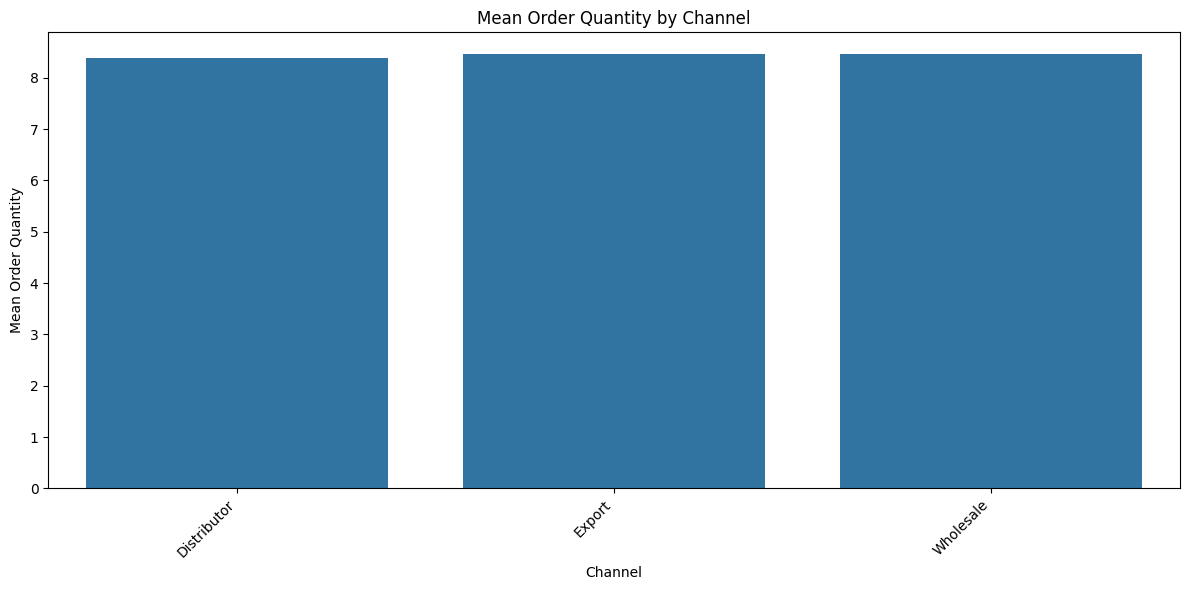

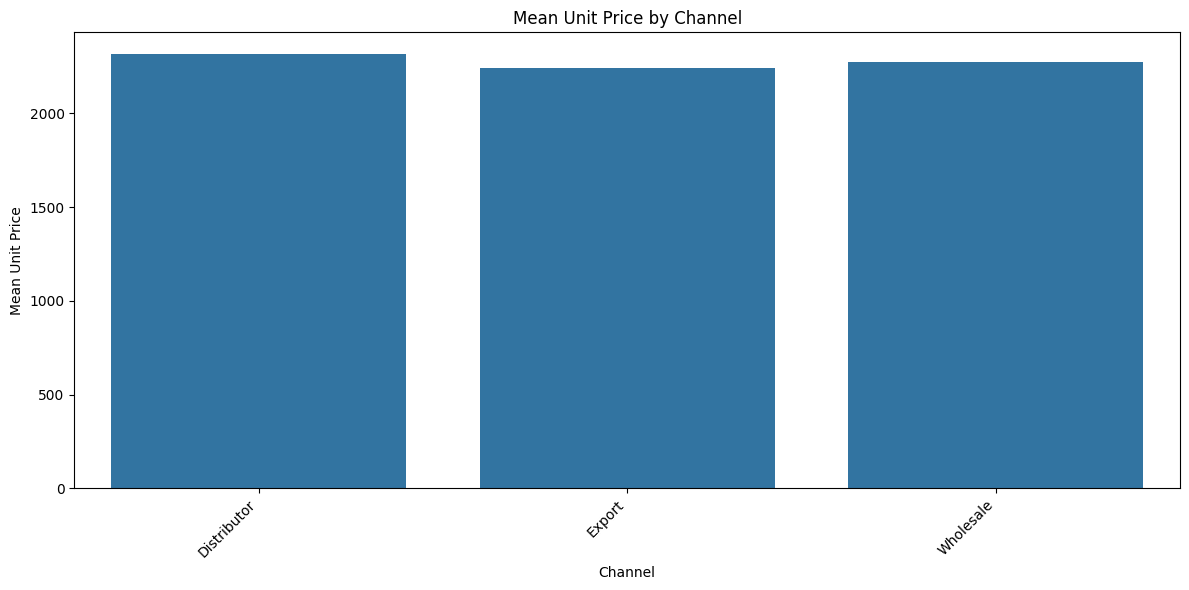

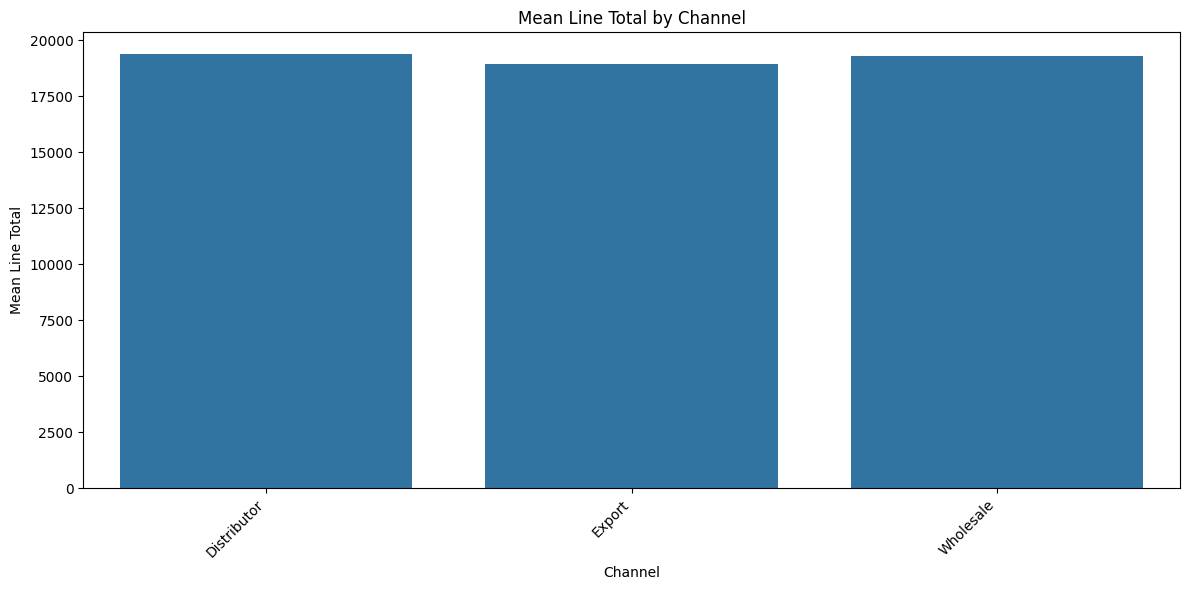

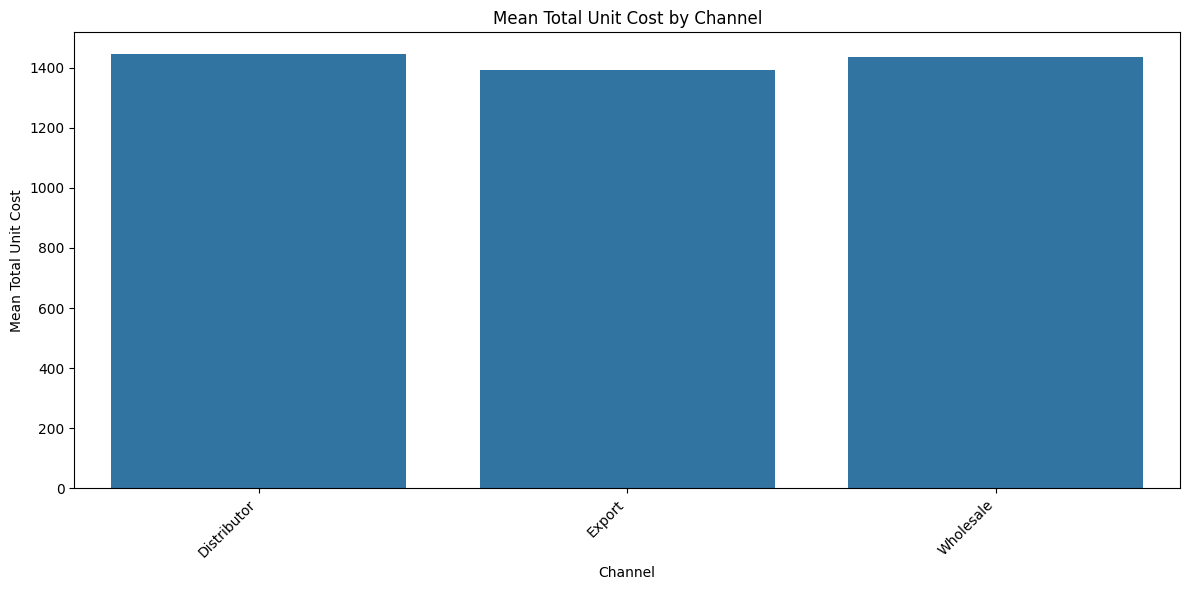

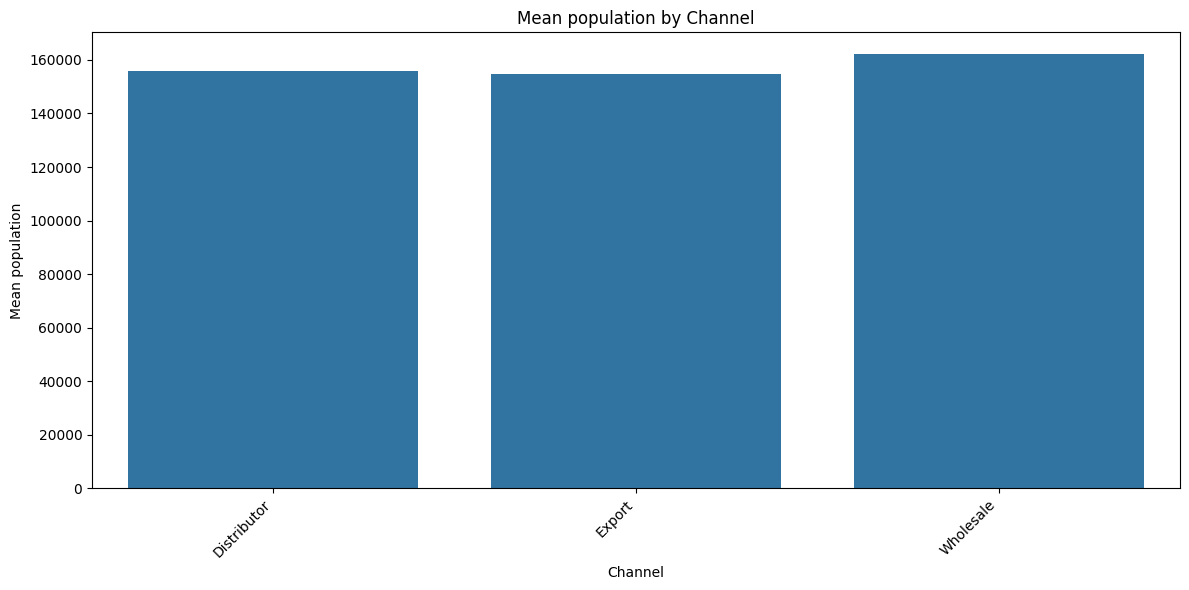

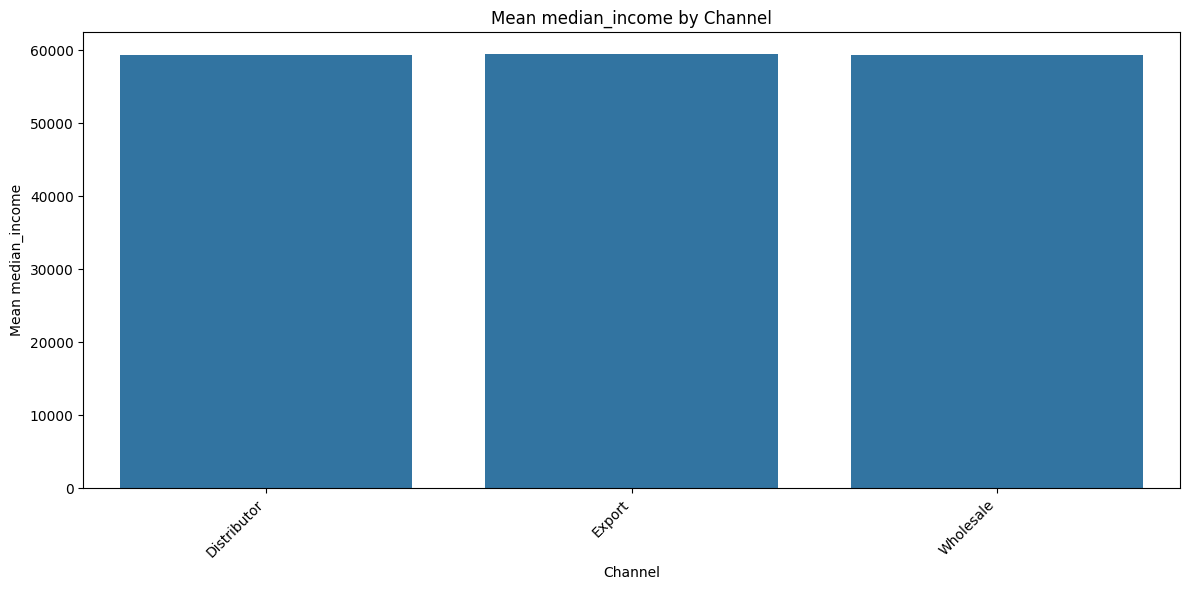

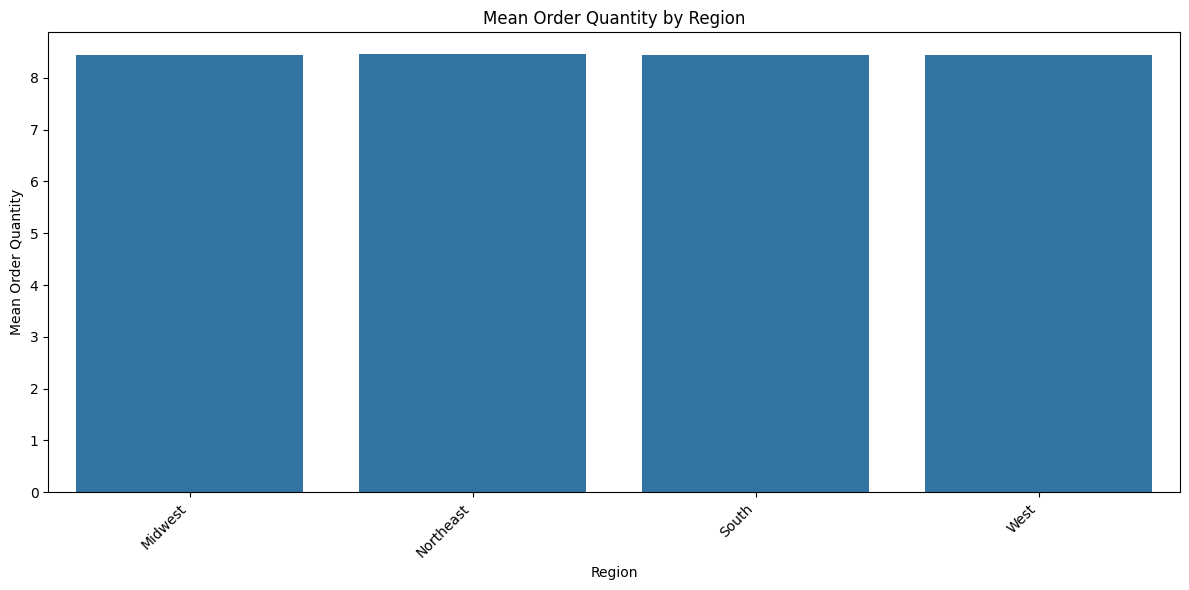

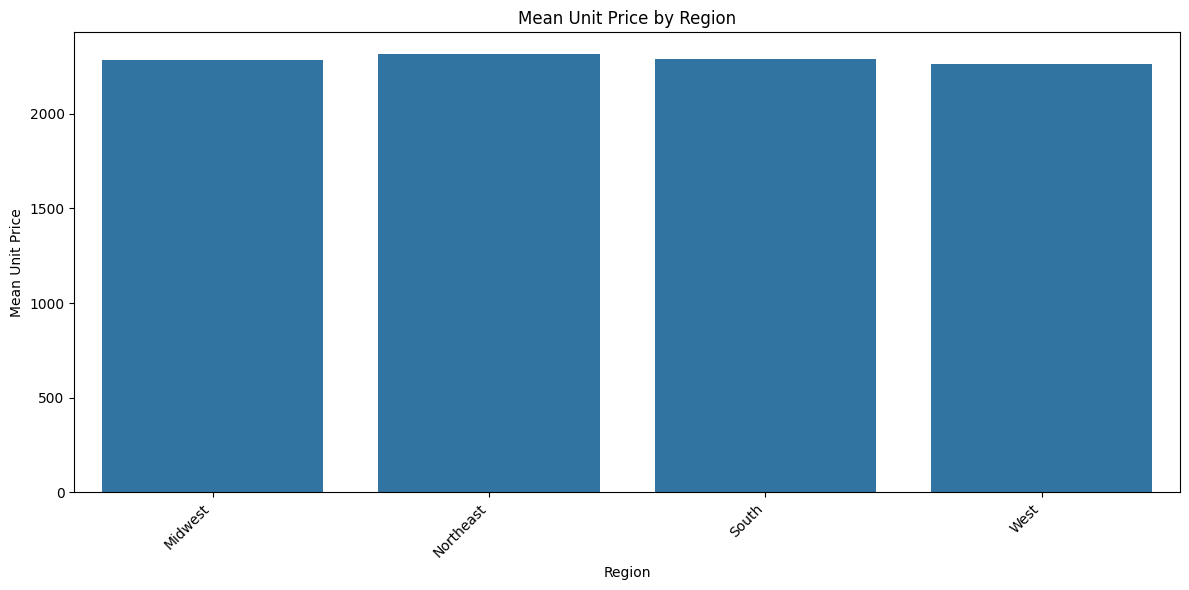

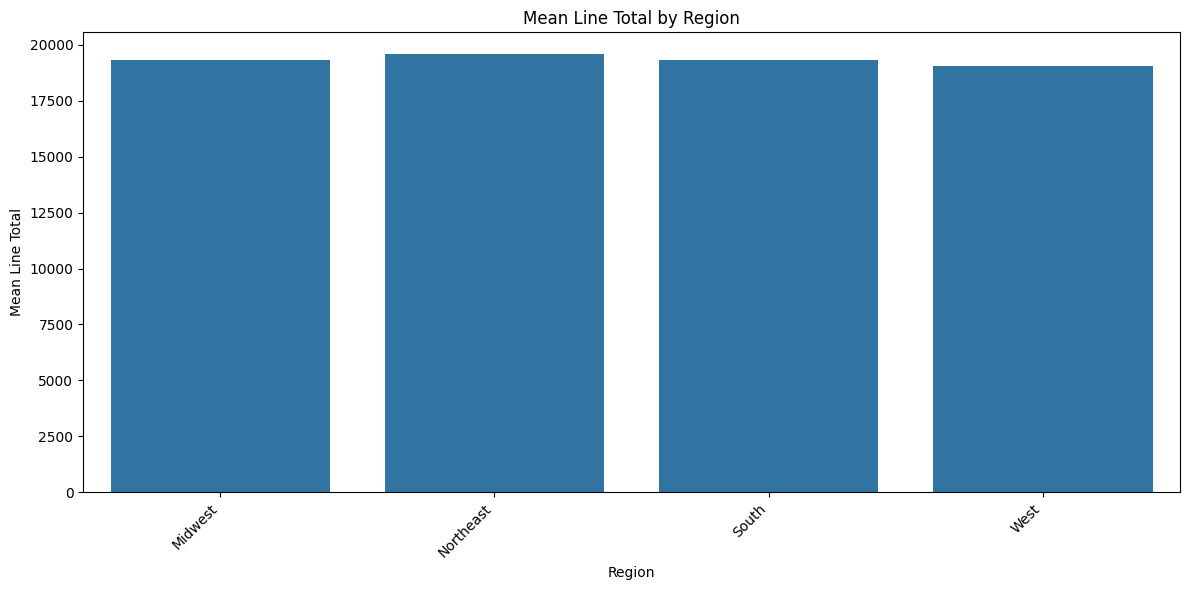

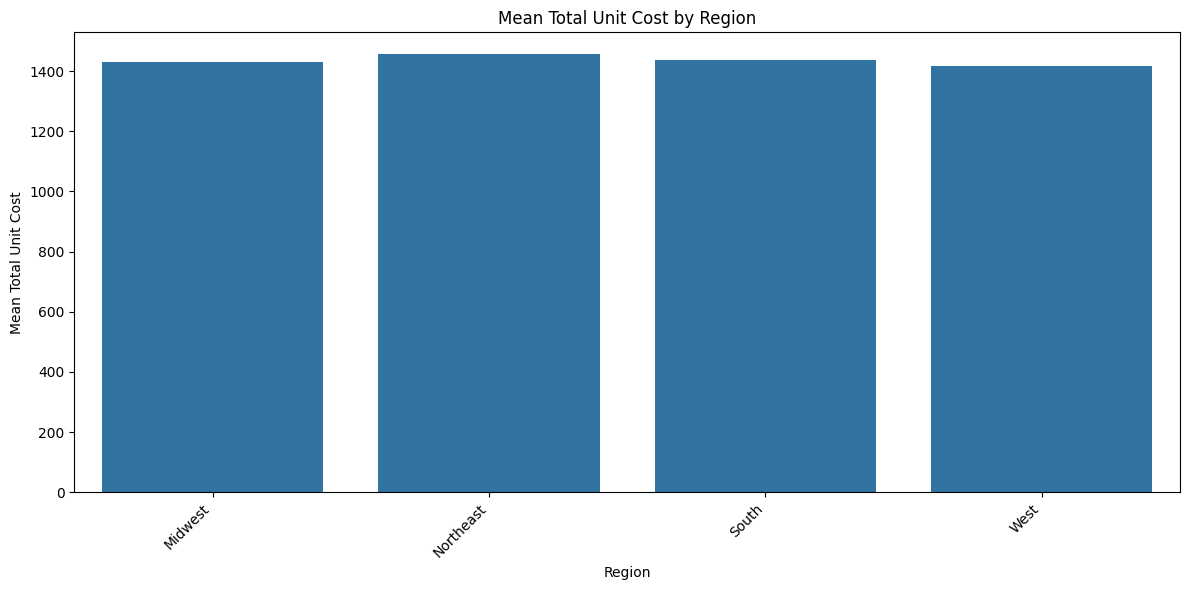

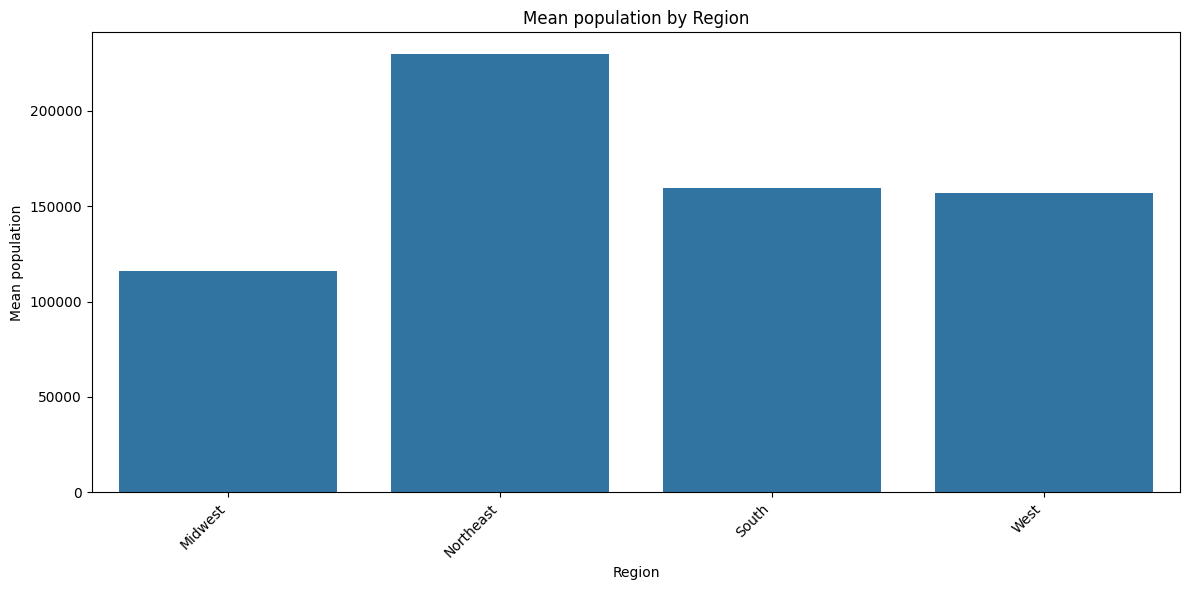

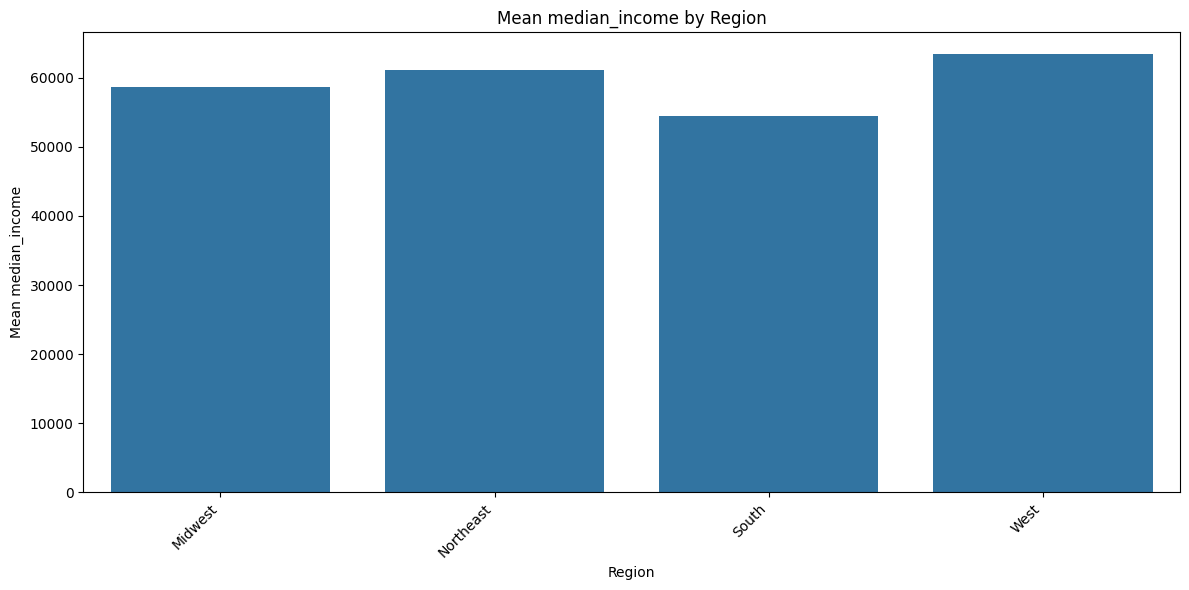

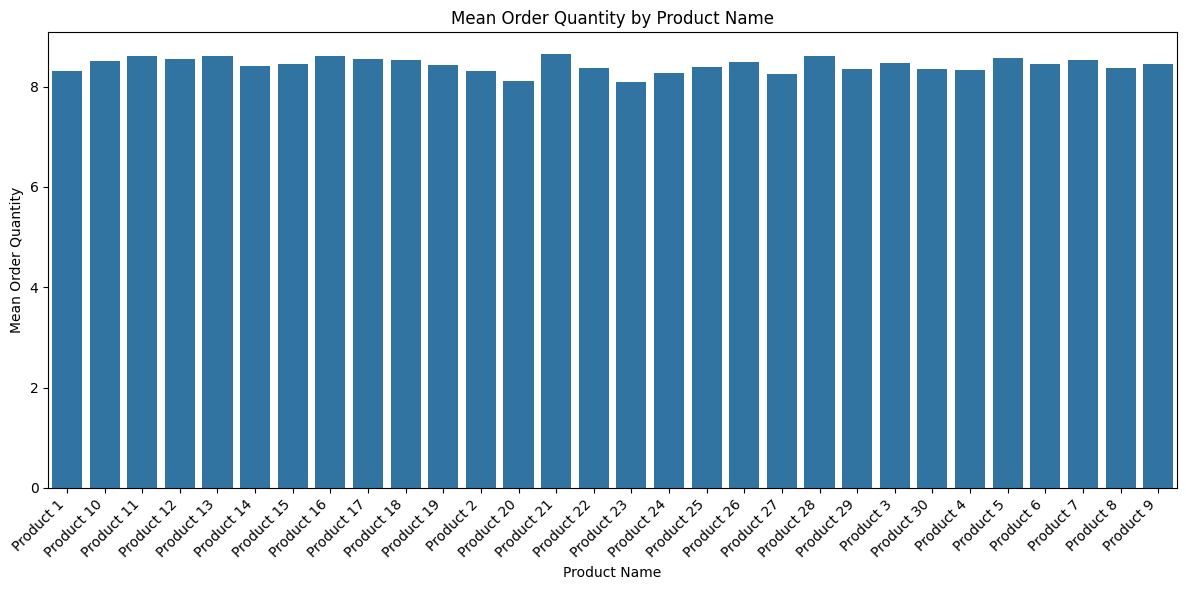

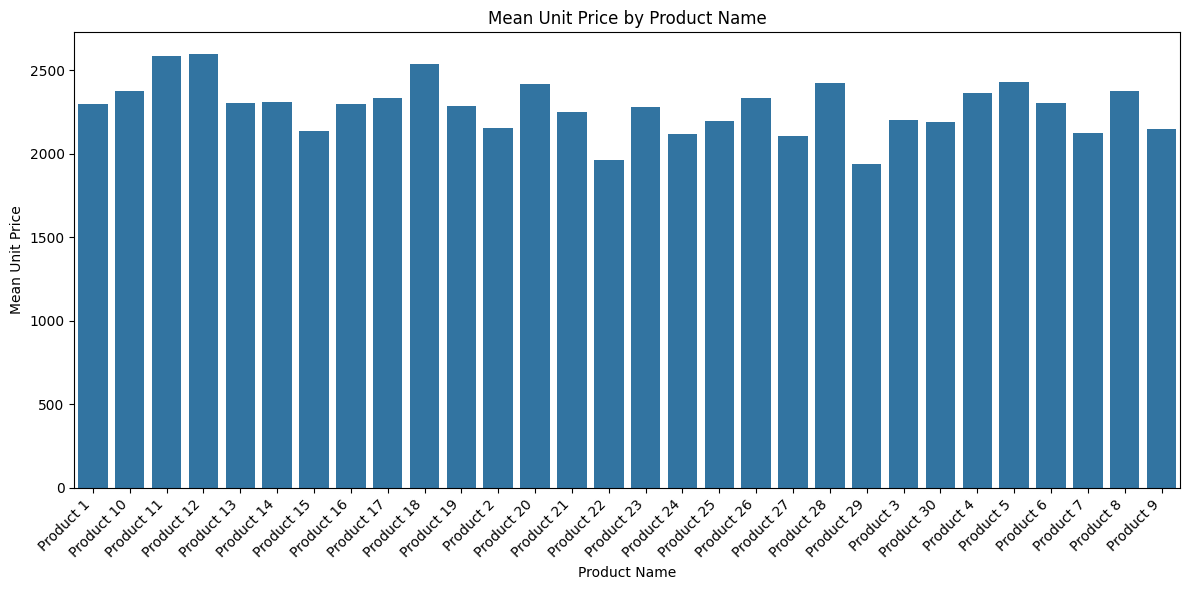

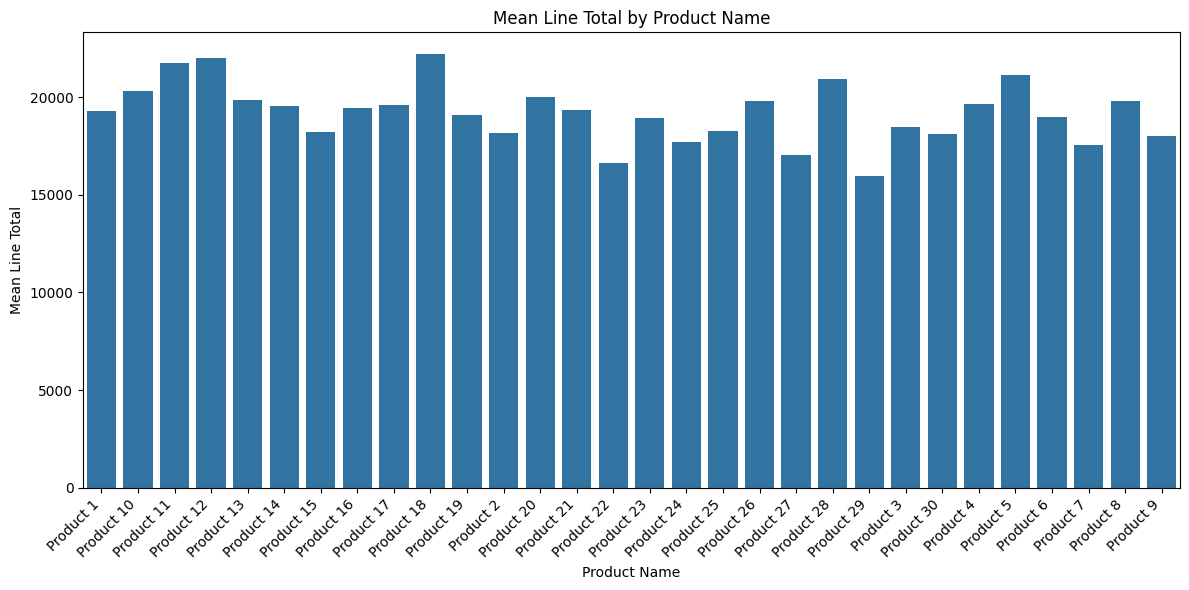

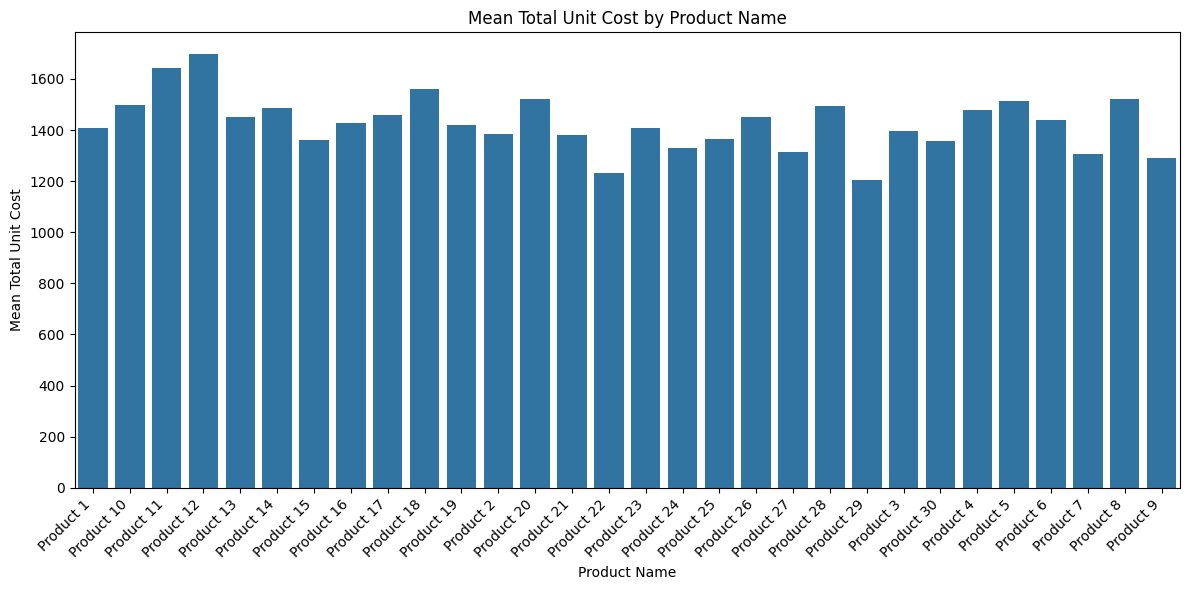

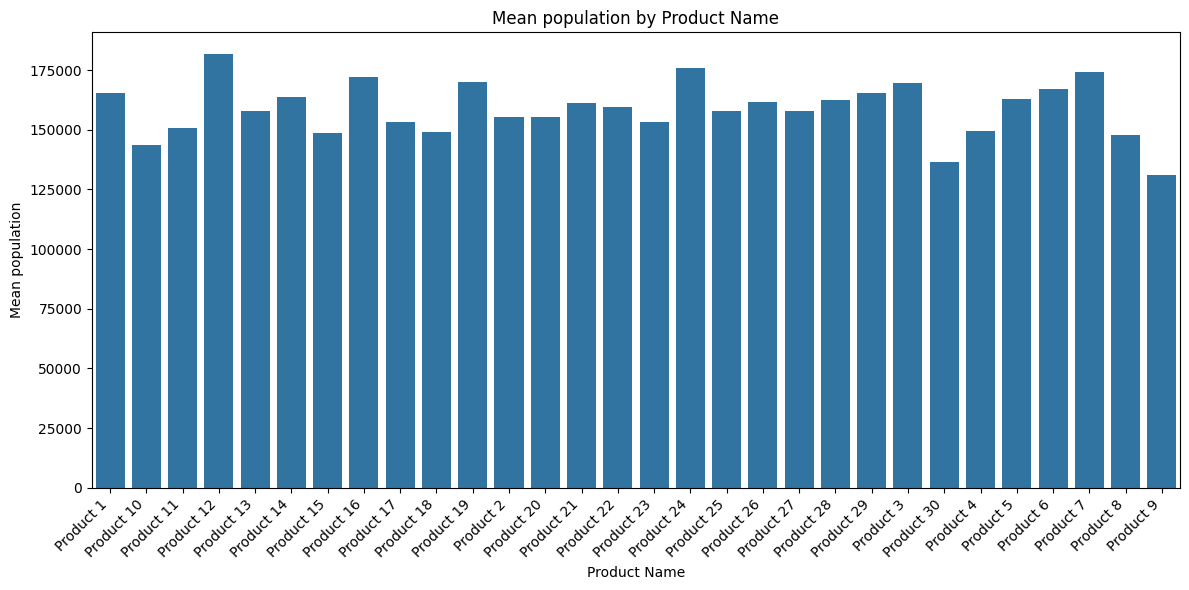

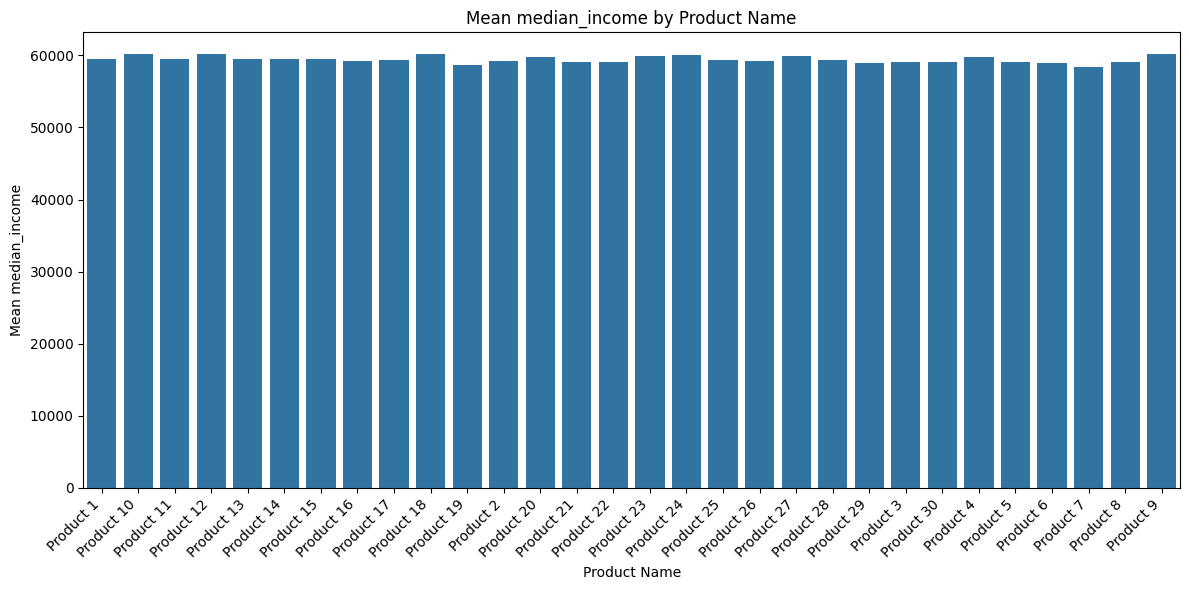

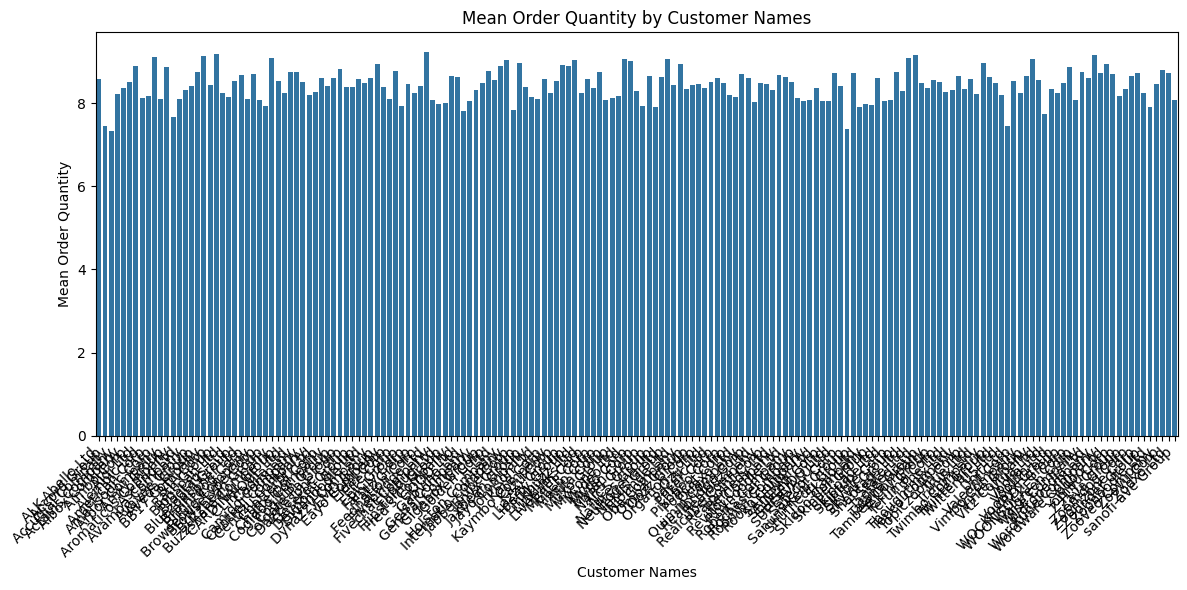

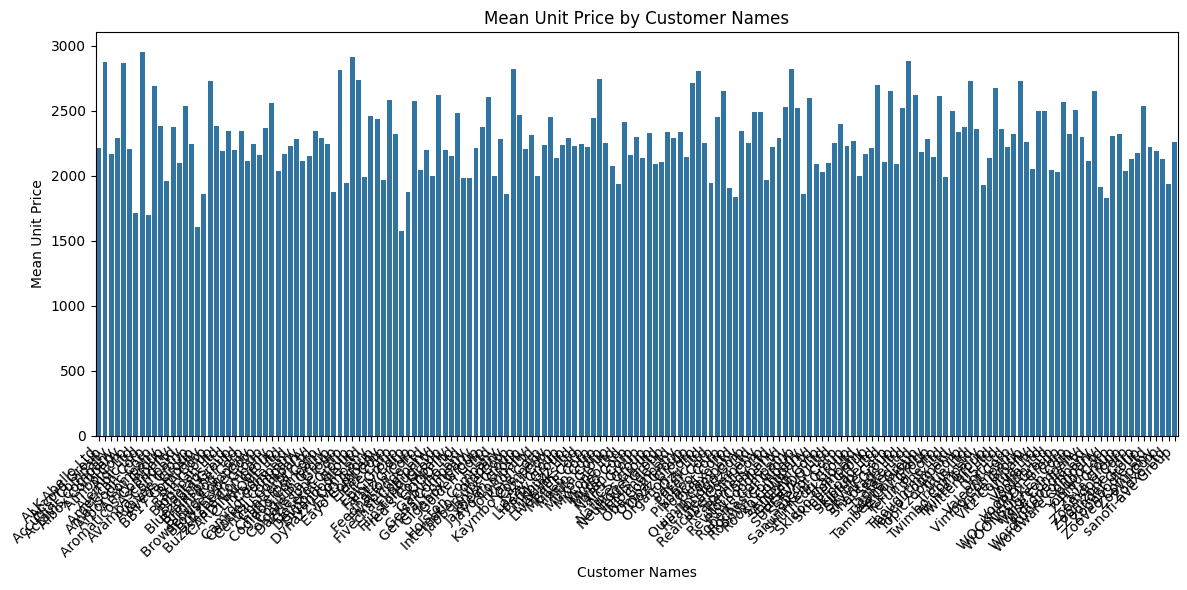

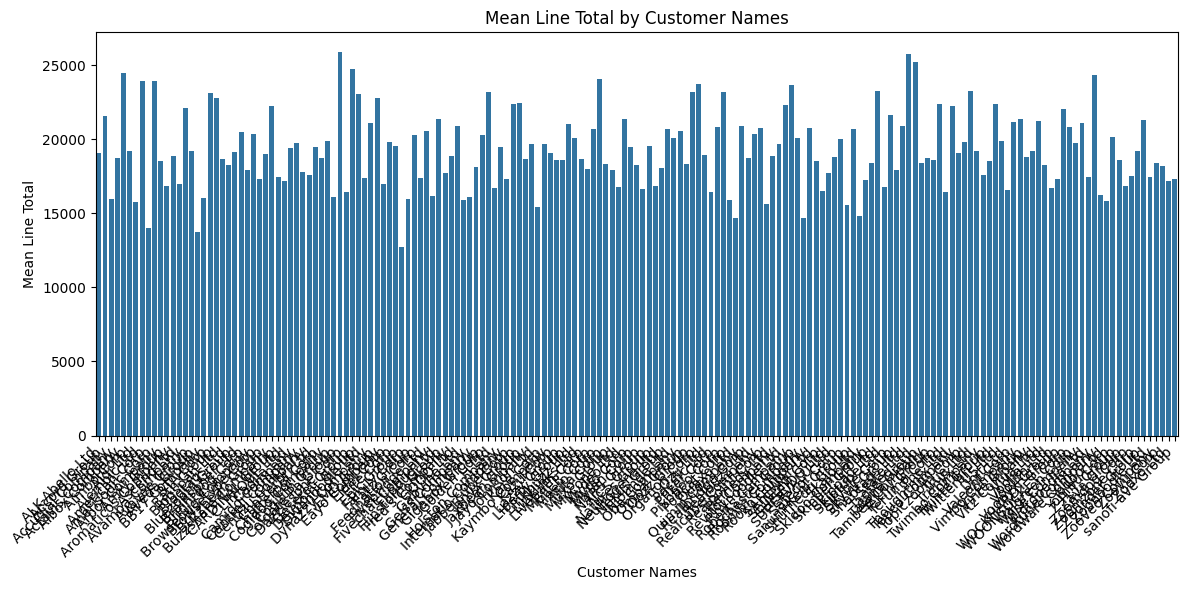

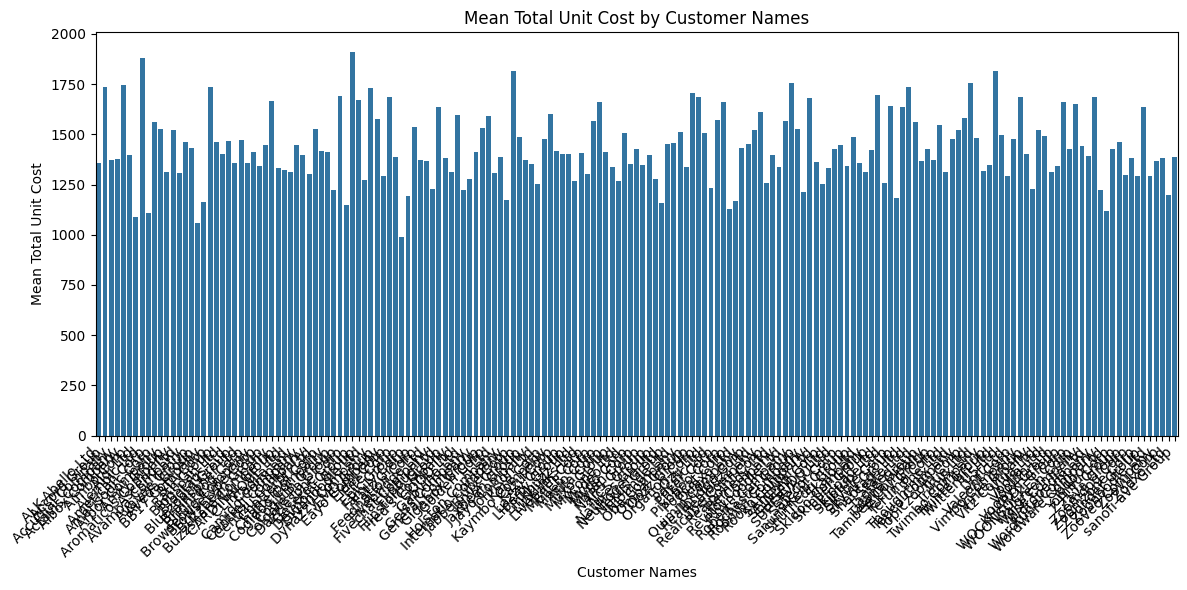

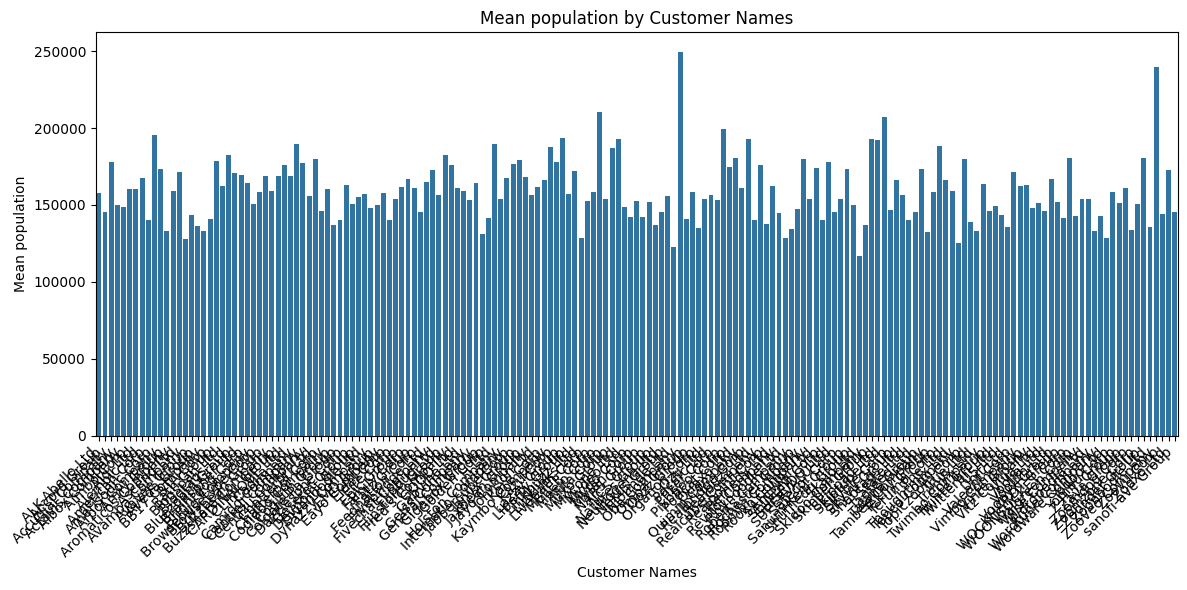

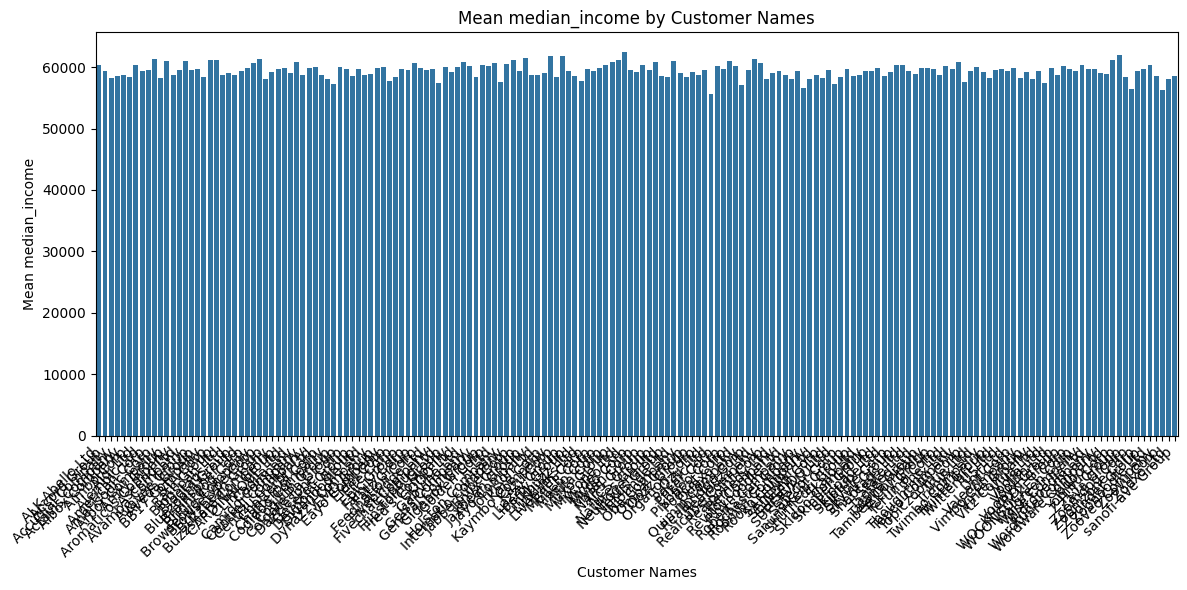

In [16]:
for cat_col in selected_categorical_cols:
    for num_col in selected_numerical_cols:
        # Calculate the mean of the numerical column grouped by the categorical column
        mean_by_category = df_merged.groupby(cat_col)[num_col].mean().reset_index()

        plt.figure(figsize=(12, 6))
        sns.barplot(data=mean_by_category, x=cat_col, y=num_col)
        plt.title(f'Mean {num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(f'Mean {num_col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()




# Relationships between categorical columns using cross-tabulations and visualizations.



Cross-tabulation of 'Channel' and 'Region':


Region       Midwest  Northeast  South   West
Channel                                      
Distributor     5183       3373   5407   6005
Export          2452       1598   2599   2891
Wholesale       8953       5672   9327  10644

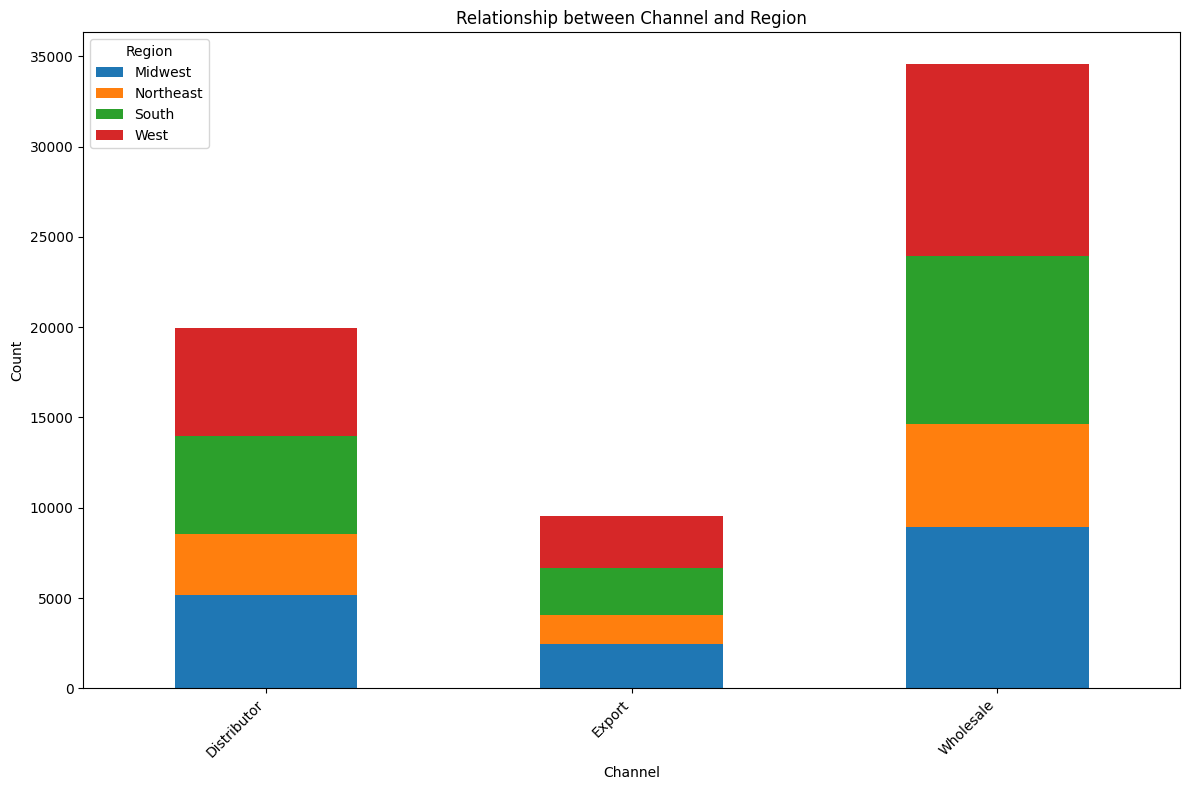


Cross-tabulation of 'Channel' and 'Product Name':


Product Name  Product 1  Product 10  Product 11  Product 12  Product 13  \
Channel                                                                   
Distributor         912         240         312         390        1218   
Export              402         162         108         126         534   
Wholesale          1590         468         606         582        2196   

Product Name  Product 14  Product 15  Product 16  Product 17  Product 18  ...  \
Channel                                                                   ...   
Distributor         1170        1314         618         720         744  ...   
Export               672         558         312         288         264  ...   
Wholesale           2016        1824         996        1062        1074  ...   

Product Name  Product 28  Product 29  Product 3  Product 30  Product 4  \
Channel                                                                  
Distributor          384         330        954         300        798   
Export                96         108        390         156        474   
Wholesale            516         522       1458         570       1614   

Product Name  Product 5  Product 6  Product 7  Product 8  Product 9  
Channel                                                              
Distributor        1038        672        252        222        264  
Export              474        342        150        162        144  
Wholesale          1836       1104        570        618        402  

[3 rows x 30 columns]

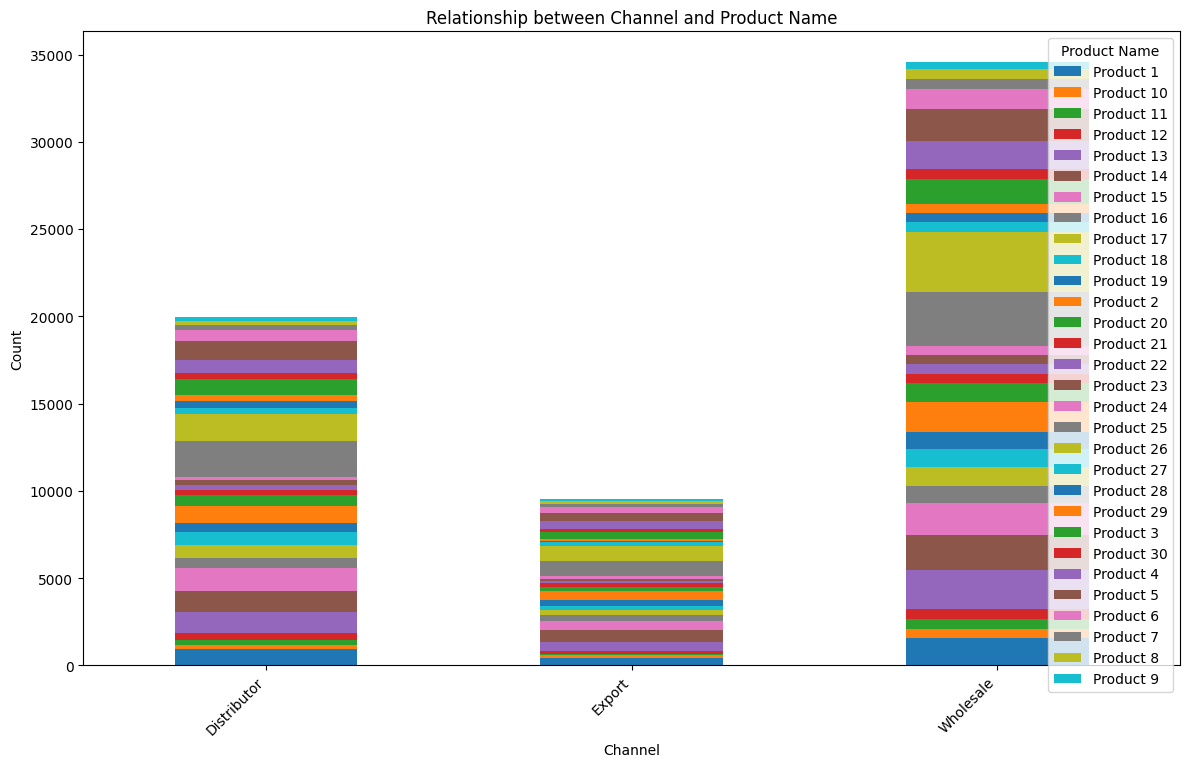


Cross-tabulation of 'Channel' and 'Customer Names':


Customer Names  ALK-Abello Ltd  Accord Group  Accudial Company  \
Channel                                                          
Distributor                162           126                96   
Export                      66            42                36   
Wholesale                  174           162               234   

Customer Names  Actavis Company  Aibox Company  Aimbo Corp  Aldi Ltd  \
Channel                                                                
Distributor                 120            144         120       102   
Export                       60            120          84        54   
Wholesale                   198            252         234       174   

Customer Names  Alembic Ltd  American Corp  Amerisourc Corp  ...  \
Channel                                                      ...   
Distributor             108            108              102  ...   
Export                   84             66               36  ...   
Wholesale               156            204               84  ...   

Customer Names  Z.H.T. Group  Zava Group  Zoomdog Corp  Zoomzone Corp  \
Channel                                                                 
Distributor              108         120            60            138   
Export                    48          66            30             66   
Wholesale                150         228           198            180   

Customer Names  Zoonder Group  Zoonoodle Ltd  Zooveo Company  Zoovu Corp  \
Channel                                                                    
Distributor                78             84              84          66   
Export                     54             48              48          90   
Wholesale                 186            234             258         156   

Customer Names  Zooxo Ltd  sanofi-ave Group  
Channel                                      
Distributor           120                78  
Export                 36                36  
Wholesale             210               198  

[3 rows x 175 columns]

/tmp/ipython-input-3143904870.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


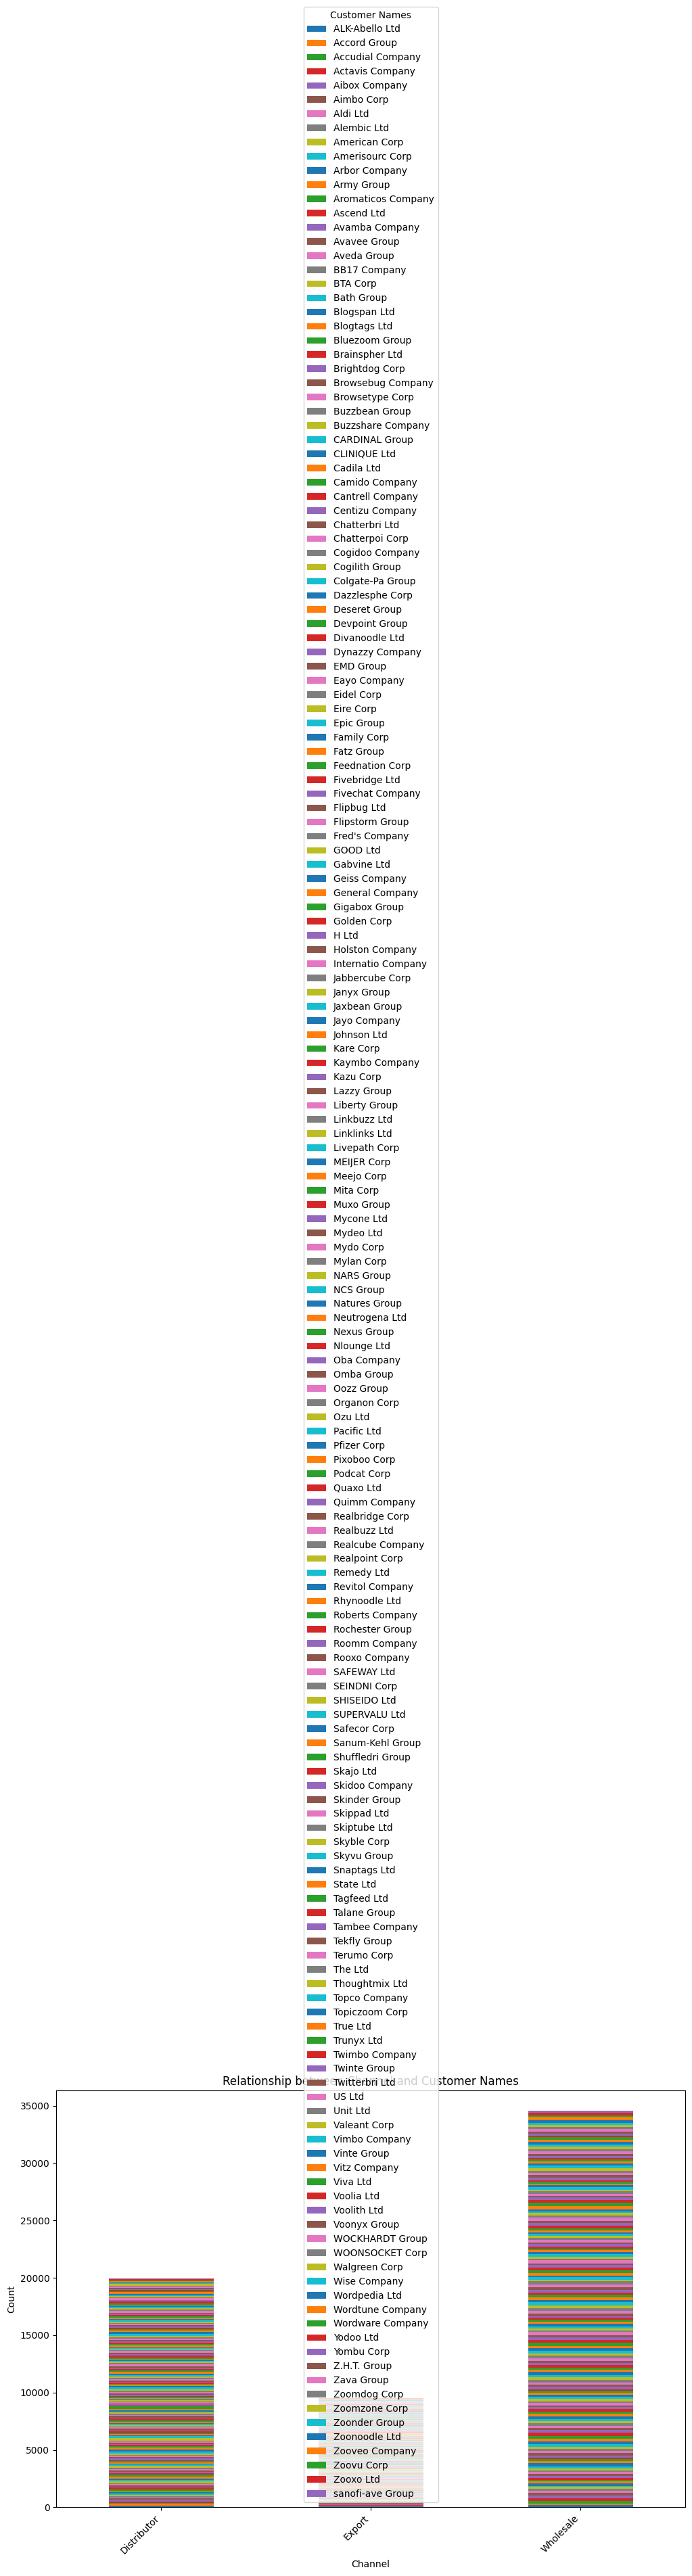


Cross-tabulation of 'Region' and 'Product Name':


Product Name  Product 1  Product 10  Product 11  Product 12  Product 13  \
Region                                                                    
Midwest             732         227         252         280         992   
Northeast           520         159         149         182         647   
South               803         228         281         291        1068   
West                849         256         344         345        1241   

Product Name  Product 14  Product 15  Product 16  Product 17  Product 18  ...  \
Region                                                                    ...   
Midwest             1041         942         482         534         544  ...   
Northeast            630         595         323         382         336  ...   
South               1027        1019         517         529         572  ...   
West                1160        1140         604         625         630  ...   

Product Name  Product 28  Product 29  Product 3  Product 30  Product 4  \
Region                                                                   
Midwest              266         251        732         265        750   
Northeast            169         156        456         163        474   
South                260         252        770         266        773   
West                 301         301        844         332        889   

Product Name  Product 5  Product 6  Product 7  Product 8  Product 9  
Region                                                               
Midwest             876        574        242        244        198  
Northeast           579        340        153        167        134  
South               920        570        285        275        235  
West                973        634        292        316        243  

[4 rows x 30 columns]

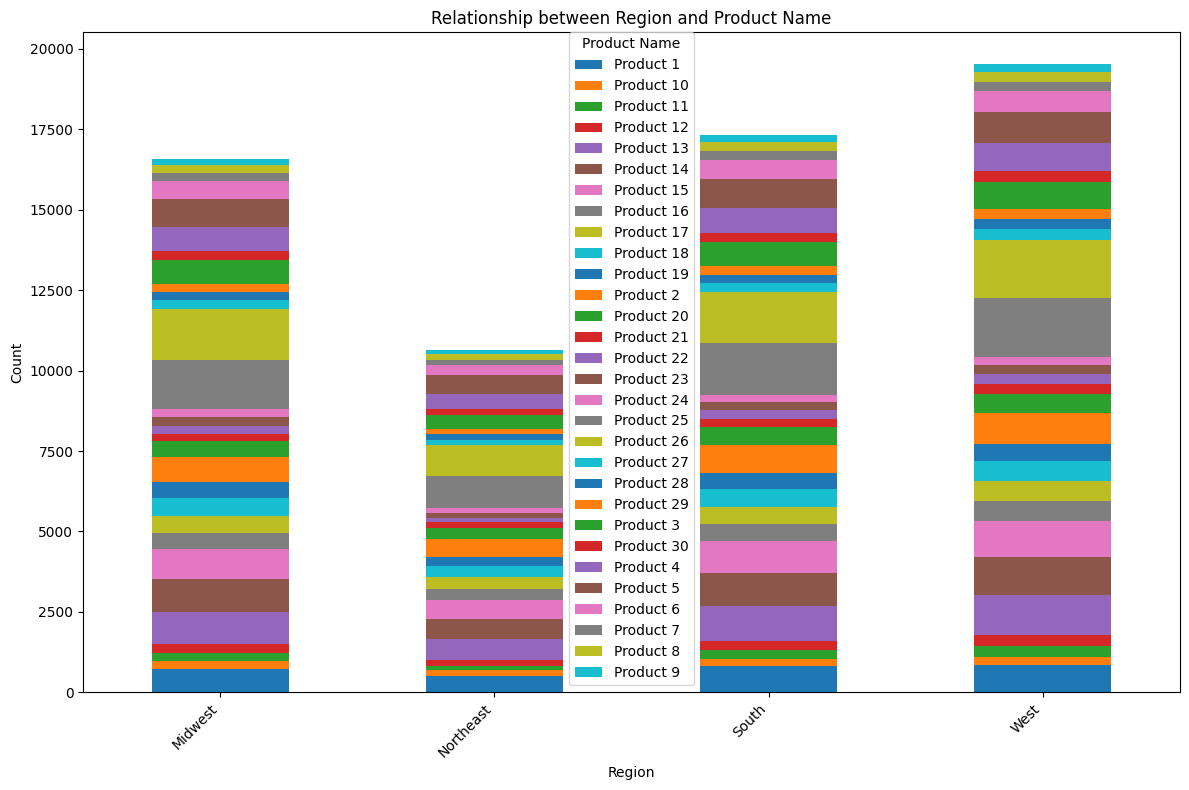


Cross-tabulation of 'Region' and 'Customer Names':


Customer Names  ALK-Abello Ltd  Accord Group  Accudial Company  \
Region                                                           
Midwest                     93            98                81   
Northeast                   72            40                59   
South                      112            95               100   
West                       125            97               126   

Customer Names  Actavis Company  Aibox Company  Aimbo Corp  Aldi Ltd  \
Region                                                                 
Midwest                     108            120         117        92   
Northeast                    58            107          70        50   
South                        94            135         102        93   
West                        118            154         149        95   

Customer Names  Alembic Ltd  American Corp  Amerisourc Corp  ...  \
Region                                                       ...   
Midwest                  94            105               68  ...   
Northeast                67             57               38  ...   
South                    96            113               55  ...   
West                     91            103               61  ...   

Customer Names  Z.H.T. Group  Zava Group  Zoomdog Corp  Zoomzone Corp  \
Region                                                                  
Midwest                   75         138            62             98   
Northeast                 51          65            59             52   
South                     80          99            97            115   
West                     100         112            70            119   

Customer Names  Zoonder Group  Zoonoodle Ltd  Zooveo Company  Zoovu Corp  \
Region                                                                     
Midwest                    82             93             105          82   
Northeast                  49             67              64          44   
South                      87             97             100          94   
West                      100            109             121          92   

Customer Names  Zooxo Ltd  sanofi-ave Group  
Region                                       
Midwest                84                83  
Northeast              66                51  
South                 107                75  
West                  109               103  

[4 rows x 175 columns]

/tmp/ipython-input-3143904870.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


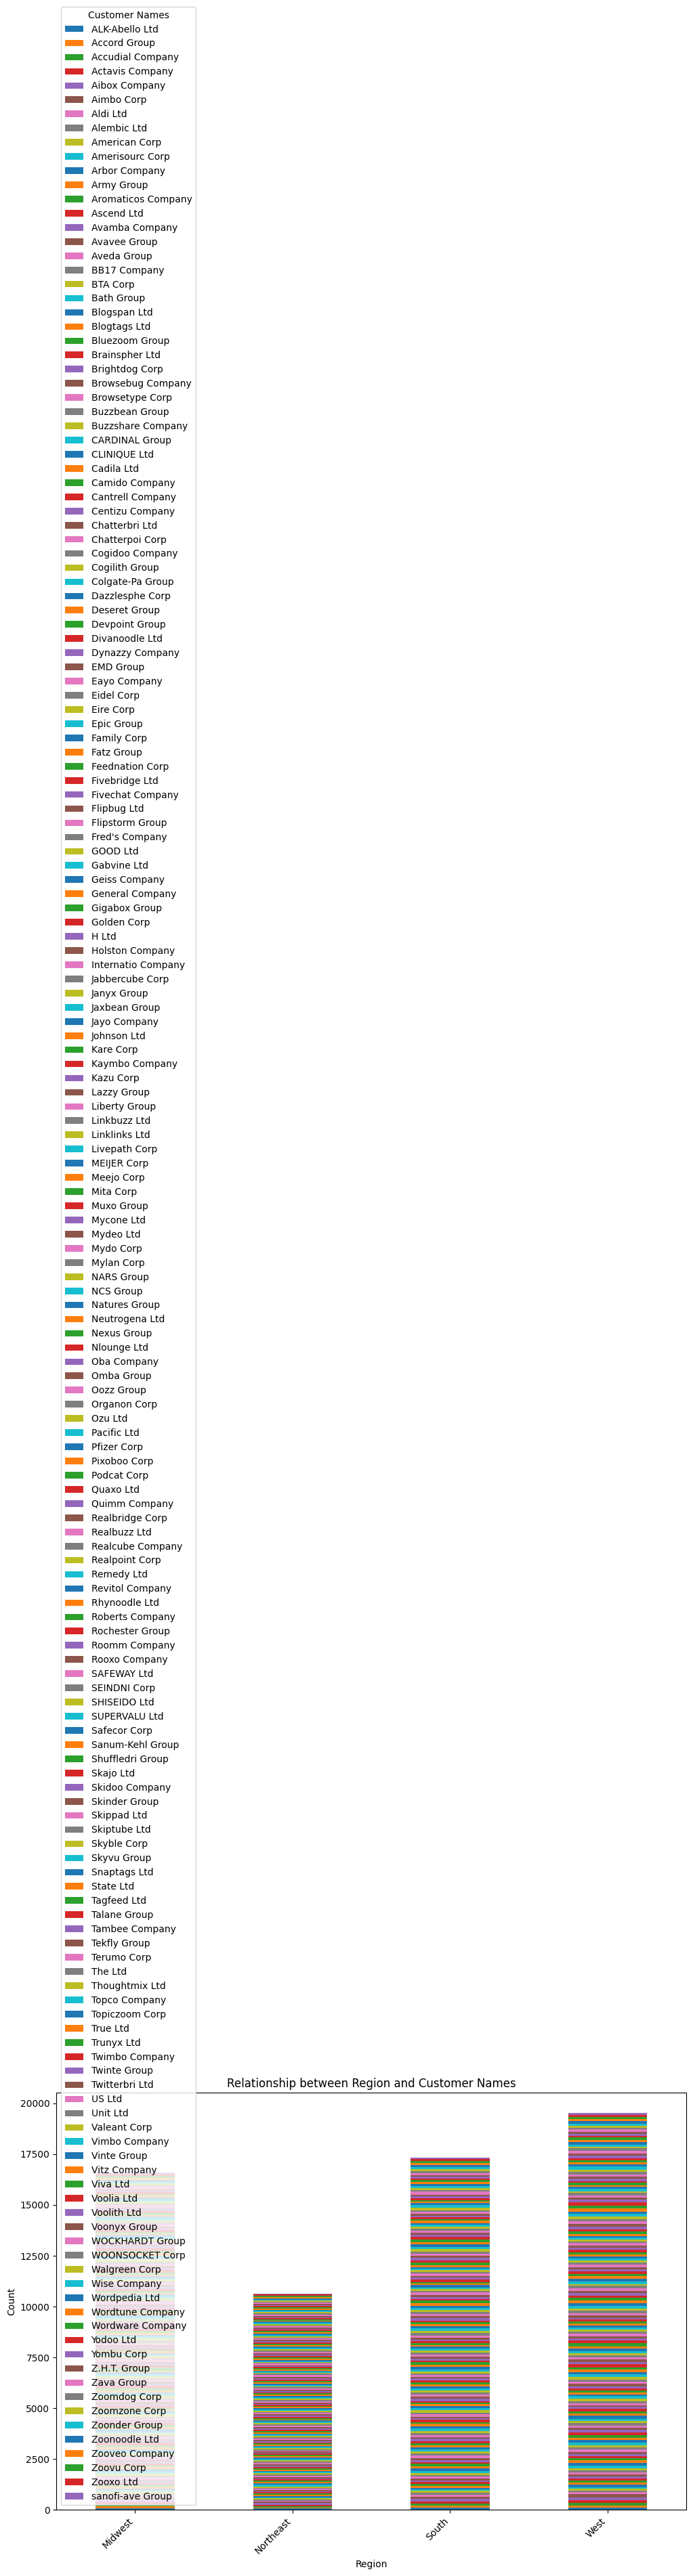


Cross-tabulation of 'Product Name' and 'Customer Names':


Customer Names  ALK-Abello Ltd  Accord Group  Accudial Company  \
Product Name                                                     
Product 1                   12            12                 0   
Product 10                  18             0                 0   
Product 11                   0             0                 6   
Product 12                  18             0                 6   
Product 13                  12             0                 6   
Product 14                  36             6                30   
Product 15                  24            18                 6   
Product 16                   6             6                 0   
Product 17                  18             6                12   
Product 18                   0            18                12   
Product 19                  12             0                12   
Product 2                   30            24                18   
Product 20                  24            18                48   
Product 21                   6             0                 6   
Product 22                  12             0                 0   
Product 23                   0            12                18   
Product 24                   0             0                 6   
Product 25                  42            24                42   
Product 26                  12            30                48   
Product 27                   0             6                12   
Product 28                  18            12                 0   
Product 29                   0             0                18   
Product 3                   18            36                24   
Product 30                   6            18                12   
Product 4                   36            24                18   
Product 5                   18            18                 0   
Product 6                   12            30                 0   
Product 7                   12             0                 6   
Product 8                    0             6                 0   
Product 9                    0             6                 0   

Customer Names  Actavis Company  Aibox Company  Aimbo Corp  Aldi Ltd  \
Product Name                                                           
Product 1                     6              0          18         0   
Product 10                    0              6           0        12   
Product 11                    0              0           0         6   
Product 12                   30             30           6        12   
Product 13                   24             54          42        12   
Product 14                   36             48          18        18   
Product 15                   30             24          54        18   
Product 16                    0              0           0         0   
Product 17                    6             30          18         6   
Product 18                   30             24          36         0   
Product 19                   24             24           6         0   
Product 2                    12             36           6         6   
Product 20                    6              6          12         0   
Product 21                    6              0           6         0   
Product 22                    0              0           6        12   
Product 23                    6              0           0        12   
Product 24                    0              0           0         0   
Product 25                   24             42          30        54   
Product 26                   36             48          30        42   
Product 27                    0              6           0        18   
Product 28                    0              0          30         0   
Product 29                    6             12          12         0   
Product 3                    18             42          30        36   
Product 30                    6              0           0         0   
Product 4      

/tmp/ipython-input-3143904870.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


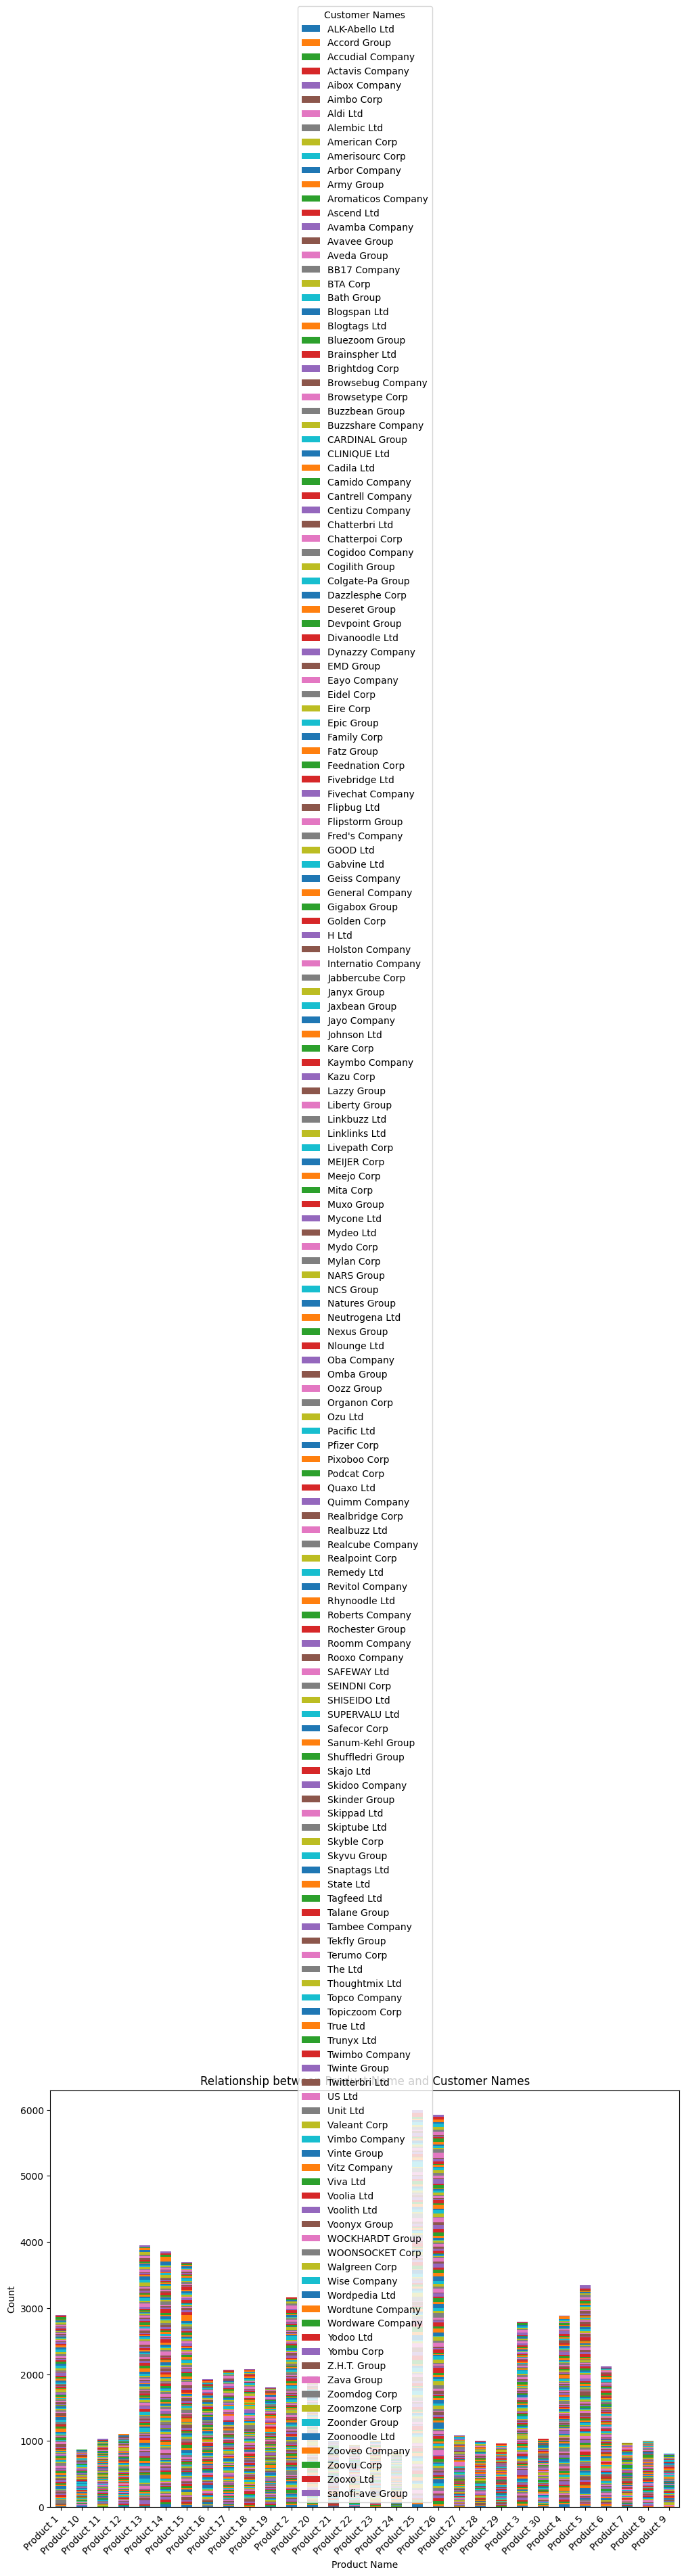

In [17]:
import itertools

# Analyze relationships between categorical columns
selected_categorical_cols = [
    'Channel',
    'Region',
    'Product Name',
    'Customer Names'
]

# Get all unique pairs of categorical columns
categorical_pairs = list(itertools.combinations(selected_categorical_cols, 2))

for col1, col2 in categorical_pairs:
    print(f"\nCross-tabulation of '{col1}' and '{col2}':")
    crosstab = pd.crosstab(df_merged[col1], df_merged[col2])
    display(crosstab)

    # Generate a stacked bar plot
    plt.figure(figsize=(12, 8))
    crosstab.plot(kind='bar', stacked=True, figsize=(12, 8), ax=plt.gca())
    plt.title(f'Relationship between {col1} and {col2}')
    plt.xlabel(col1)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#Top 10 customers by line total  

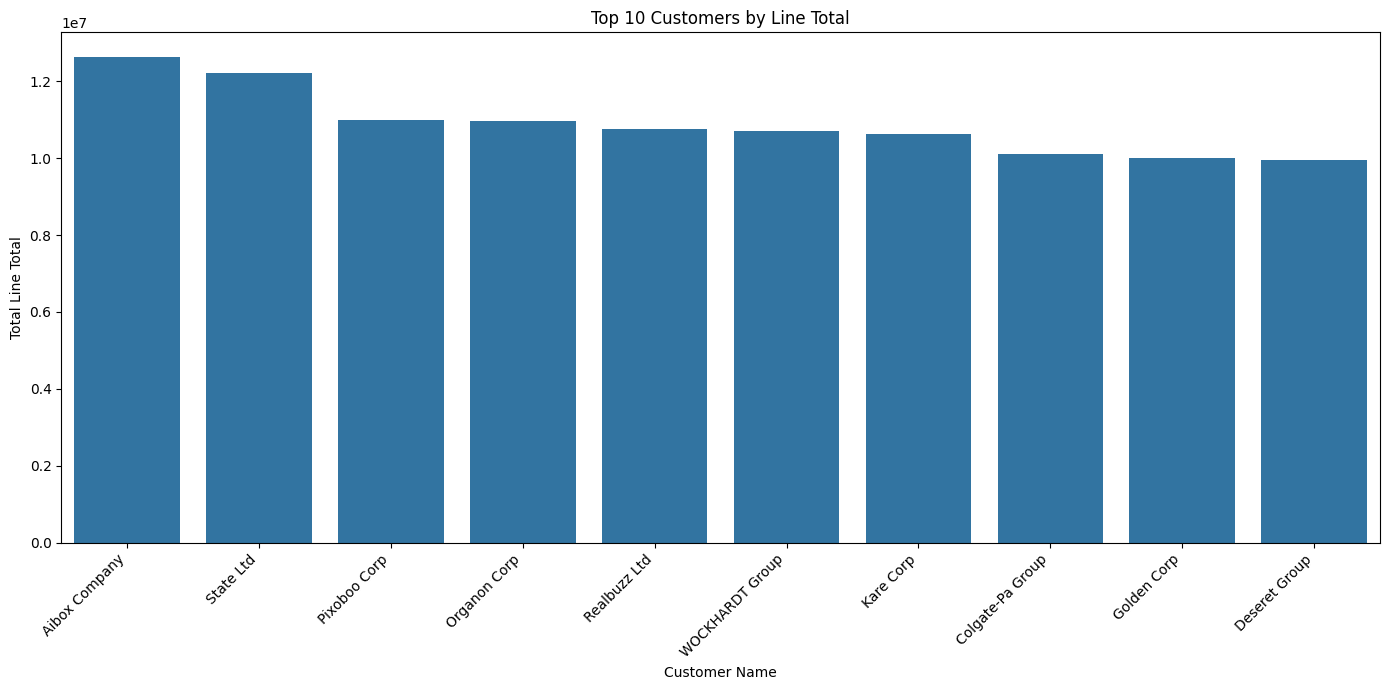

In [18]:
# Calculating the total line total for each customer
customer_line_total = df_merged.groupby('Customer Names')['Line Total'].sum().reset_index()

# Sorting customers by total line total
customer_line_total_sorted = customer_line_total.sort_values(by='Line Total', ascending=False)

# Getting the top 10 customers
top_10_customers = customer_line_total_sorted.head(10)

# Creating a bar chart for the top 10 customers
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_customers, x='Customer Names', y='Line Total')
plt.title('Top 10 Customers by Line Total')
plt.xlabel('Customer Name')
plt.ylabel('Total Line Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Bottom 10 customers by line total


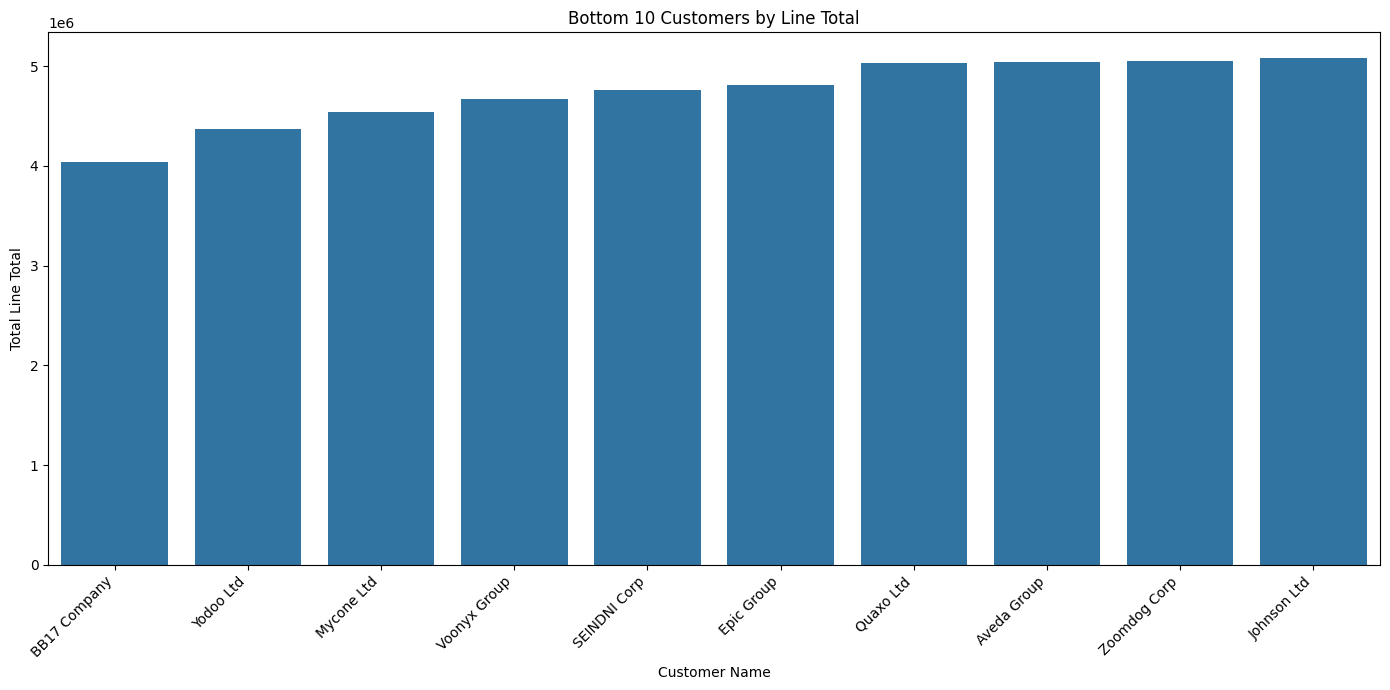

In [19]:
# Calculate the total line total for each customer and sort in ascending order
customer_line_total_sorted_asc = customer_line_total.sort_values(by='Line Total', ascending=True)

# Get the bottom 10 customers
bottom_10_customers = customer_line_total_sorted_asc.head(10)

# Create a bar chart for the bottom 10 customers
plt.figure(figsize=(14, 7))
sns.barplot(data=bottom_10_customers, x='Customer Names', y='Line Total')
plt.title('Bottom 10 Customers by Line Total')
plt.xlabel('Customer Name')
plt.ylabel('Total Line Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#top 10 states by line total

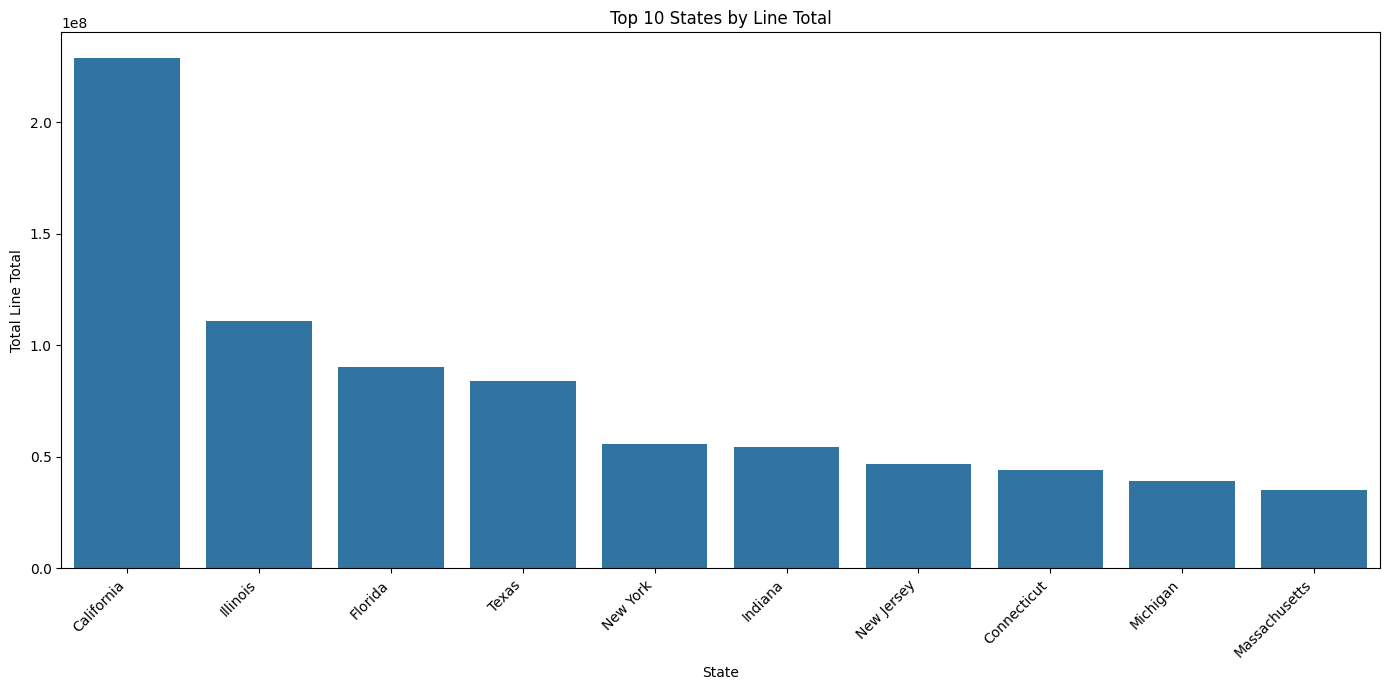

In [20]:
# Calculate the total line total for each state
state_line_total = df_merged.groupby('State')['Line Total'].sum().reset_index()

# Sort states by total line total in descending order
state_line_total_sorted = state_line_total.sort_values(by='Line Total', ascending=False)

# Get the top 10 states
top_10_states = state_line_total_sorted.head(10)

# Create a bar chart for the top 10 states
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_states, x='State', y='Line Total')
plt.title('Top 10 States by Line Total')
plt.xlabel('State')
plt.ylabel('Total Line Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Bottom 10 states by line total

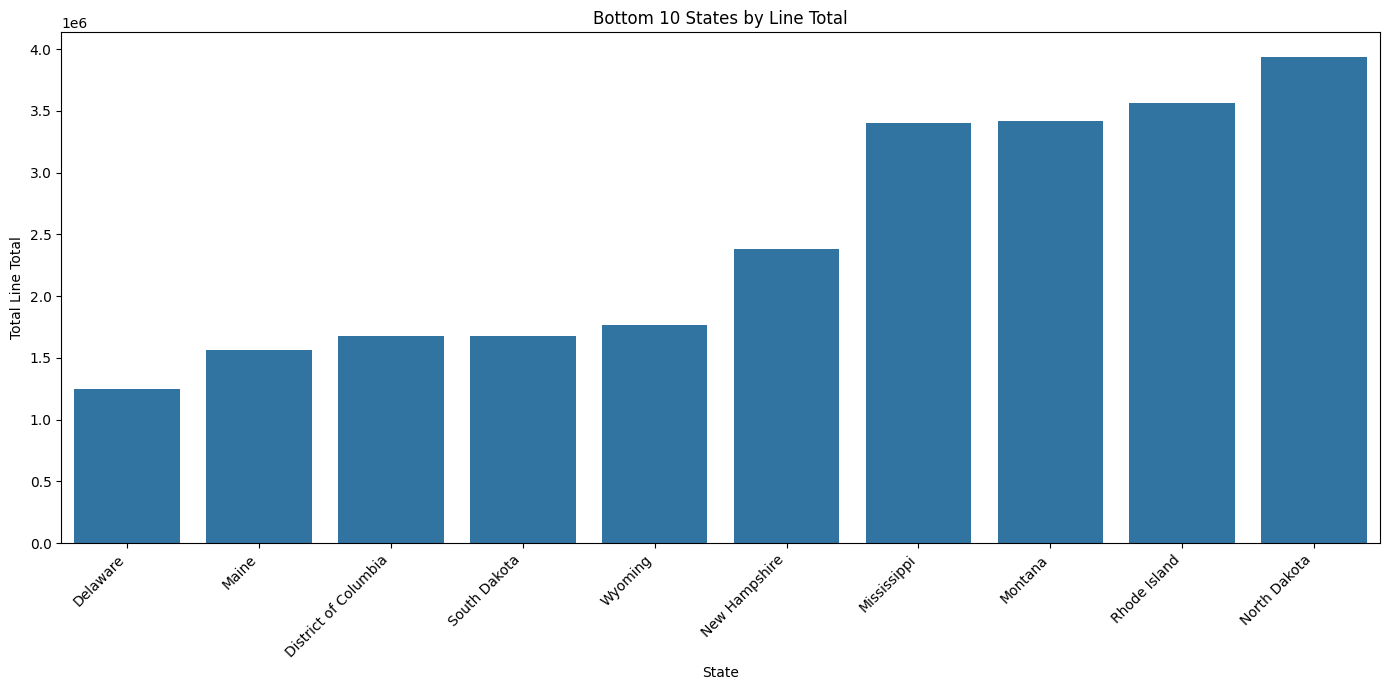

In [21]:
# Calculate the total line total for each state
state_line_total = df_merged.groupby('State')['Line Total'].sum().reset_index()

# Sort states by total line total in ascending order to get the bottom states
state_line_total_sorted_asc = state_line_total.sort_values(by='Line Total', ascending=True)

# Get the bottom 10 states
bottom_10_states = state_line_total_sorted_asc.head(10)

# Create a bar chart for the bottom 10 states
plt.figure(figsize=(14, 7))
sns.barplot(data=bottom_10_states, x='State', y='Line Total')
plt.title('Bottom 10 States by Line Total')
plt.xlabel('State')
plt.ylabel('Total Line Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Customer segmentation : line total vs profit margin

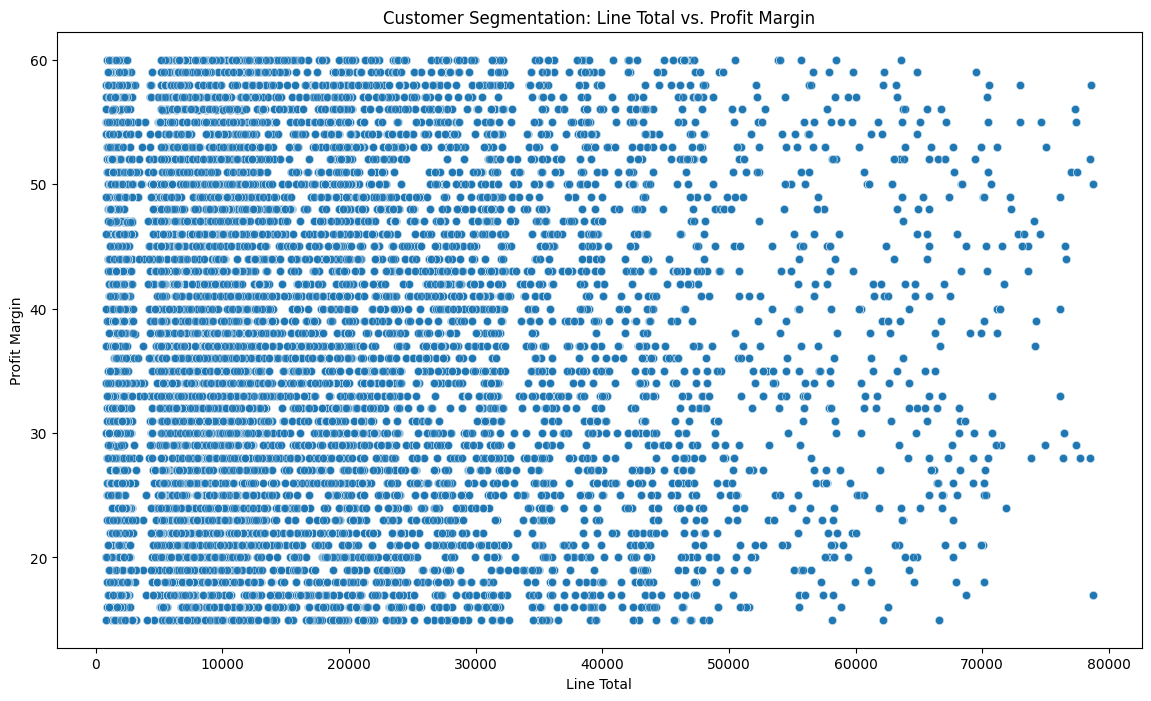

In [22]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_merged, x='Line Total', y='Profit Margin', alpha=0.6)
plt.title('Customer Segmentation: Line Total vs. Profit Margin')
plt.xlabel('Line Total')
plt.ylabel('Profit Margin')
plt.show()

#Profit margin by unit price

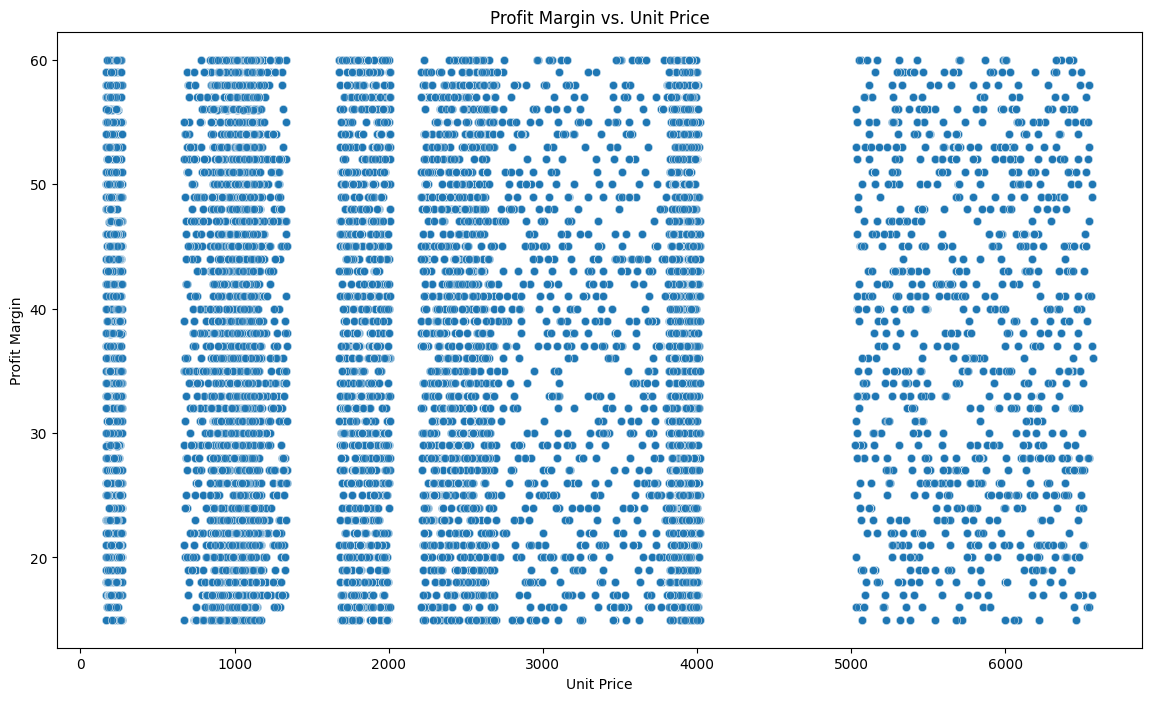

In [23]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_merged, x='Unit Price', y='Profit Margin', alpha=0.6)
plt.title('Profit Margin vs. Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Profit Margin')
plt.show()

#average profit margin by channel

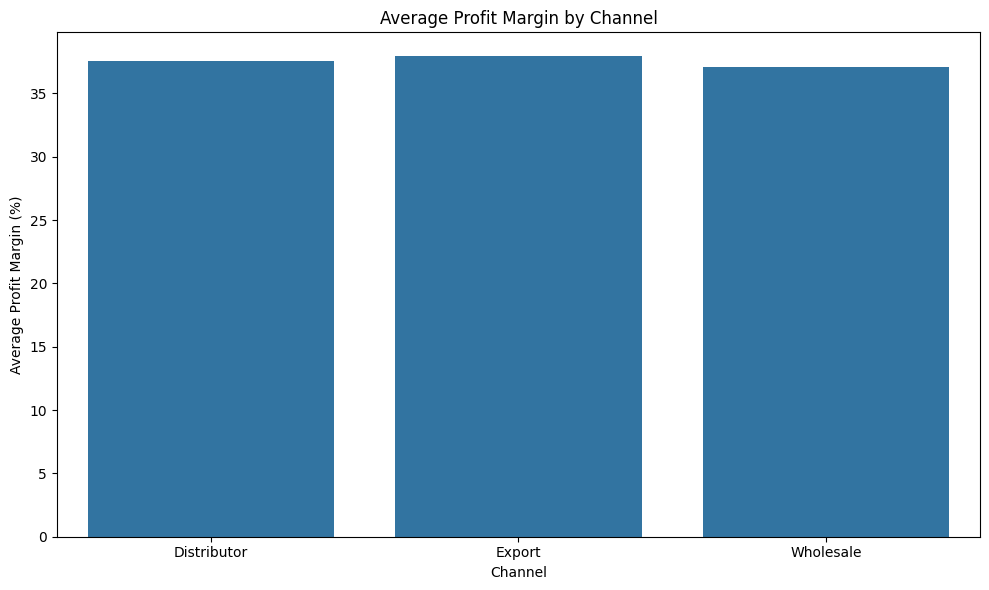

In [24]:
# Calculate the average profit margin for each channel
average_profit_margin_by_channel = df_merged.groupby('Channel')['Profit Margin'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=average_profit_margin_by_channel, x='Channel', y='Profit Margin')
plt.title('Average Profit Margin by Channel')
plt.xlabel('Channel')
plt.ylabel('Average Profit Margin (%)')
plt.tight_layout()
plt.show()